**Final Project --- the relationship between depression and other factors**

**Hailey  Wang**

## 1. import data

In [95]:
import pandas as pd
import altair as alt
from scipy.stats import pearsonr
import geopandas as gpd
 
import geopandas as gpd
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
## import plotly.express as px

from shapely.geometry import shape

ModuleNotFoundError: No module named 'plotly'

In [102]:
import numpy as np

In [4]:
cdc_places = pd.read_csv('./PLACES__Local_Data_for_Better_Health__County_Data_2023_release_20231111.csv'
                        , usecols = ['Year', 'StateAbbr', 'StateDesc','LocationName','Data_Value', 'TotalPopulation','LocationID','Data_Value_Type','Short_Question_Text','Geolocation' ])
cdc_places

,Year,StateAbbr,StateDesc,LocationName,Data_Value_Type,Data_Value,TotalPopulation,LocationID,Short_Question_Text,Geolocation
0,2021,GA,Georgia,Ware,Crude prevalence,4.6,36033,13299,Stroke,POINT (-82.4215072 31.050881)
1,2021,IN,Indiana,Ohio,Crude prevalence,3.8,5978,18115,Stroke,POINT (-84.9642994 38.940527)
2,2021,IN,Indiana,Owen,Crude prevalence,4.0,21446,18119,Stroke,POINT (-86.8388453 39.3173394)
3,2021,IA,Iowa,Iowa,Crude prevalence,3.3,16568,19095,Stroke,POINT (-92.0591226 41.6839184)
4,2021,IA,Iowa,Marion,Crude prevalence,3.0,33380,19125,Stroke,POINT (-93.0938678 41.3314327)
...,...,...,...,...,...,...,...,...,...,...
228765,2021,WA,Washington,Lewis,Crude prevalence,9.6,84398,53041,Health Insurance,POINT (-122.3774443 46.5800714)
228766,2021,WI,Wisconsin,Door,Age-adjusted prevalence,22.0,30369,55029,Depression,POINT (-87.0486828 45.0934165)
228767,2021,WI,Wisconsin,Dodge,Crude prevalence,16.1,89313,55027,Current Smoking,POINT (-88.7019394 43.4296276)
228768,2021,WV,West Virginia,Cabell,Age-adjusted prevalence,18.4,93418,54011,Cognitive Disability,POINT (-82.2433966 38.4195778)


**Describe the database**

source: https://data.cdc.gov/500-Cities-Places/PLACES-Local-Data-for-Better-Health-County-Data-20/swc5-untb

time period: 2020/2021

what the data can and can't tell you: It tells the county level health indicates. This dataset includes estimates for 36 measures: 13 for health outcomes, 9 for preventive services use, 4 for chronic disease-related health risk behaviors, 7 for disabilities, and 3 for health status.

It has some data missing. For example, it has no depreesion rate for all counties in Florida. 

### 1.1 clean data

#### 1.1.1 look for missing data

In [5]:
cdc_places[
    cdc_places['Year'].isna()]


,Year,StateAbbr,StateDesc,LocationName,Data_Value_Type,Data_Value,TotalPopulation,LocationID,Short_Question_Text,Geolocation


**no missing data in year**

In [6]:
cdc_places[
    cdc_places['StateAbbr'].isna()]


,Year,StateAbbr,StateDesc,LocationName,Data_Value_Type,Data_Value,TotalPopulation,LocationID,Short_Question_Text,Geolocation


**no missing data in year**

In [7]:
cdc_places[
    cdc_places['LocationName'].isna()]

,Year,StateAbbr,StateDesc,LocationName,Data_Value_Type,Data_Value,TotalPopulation,LocationID,Short_Question_Text,Geolocation
18,2021,US,United States,NaN,Age-adjusted prevalence,2.8,331893745,59,Stroke,NaN
443,2021,US,United States,NaN,Crude prevalence,10.8,331893745,59,Health Insurance,NaN
958,2021,US,United States,NaN,Age-adjusted prevalence,16.7,331893745,59,Binge Drinking,NaN
1161,2021,US,United States,NaN,Crude prevalence,7.0,331893745,59,Cancer (except skin),NaN
1222,2021,US,United States,NaN,Crude prevalence,14.7,331893745,59,Mental Health,NaN
...,...,...,...,...,...,...,...,...,...,...
16314,2021,US,United States,NaN,Crude prevalence,15.5,331893745,59,Binge Drinking,NaN
17126,2021,US,United States,NaN,Age-adjusted prevalence,31.0,331893745,59,High Cholesterol,NaN
17140,2020,US,United States,NaN,Age-adjusted prevalence,83.7,331893745,59,Cervical Cancer Screening,NaN
17211,2021,US,United States,NaN,Crude prevalence,3.3,331893745,59,Stroke,NaN


**It seems like we are missing data of location name and geolocation for nation level data. It makes sense because there is not a specific location or geolocation for the whole nation. And we will not need nation level data later, so I am dropping the missing national data.**

In [8]:
cdc_places_drop_us = cdc_places.dropna(subset = ['LocationName'])
cdc_places_drop_us

,Year,StateAbbr,StateDesc,LocationName,Data_Value_Type,Data_Value,TotalPopulation,LocationID,Short_Question_Text,Geolocation
0,2021,GA,Georgia,Ware,Crude prevalence,4.6,36033,13299,Stroke,POINT (-82.4215072 31.050881)
1,2021,IN,Indiana,Ohio,Crude prevalence,3.8,5978,18115,Stroke,POINT (-84.9642994 38.940527)
2,2021,IN,Indiana,Owen,Crude prevalence,4.0,21446,18119,Stroke,POINT (-86.8388453 39.3173394)
3,2021,IA,Iowa,Iowa,Crude prevalence,3.3,16568,19095,Stroke,POINT (-92.0591226 41.6839184)
4,2021,IA,Iowa,Marion,Crude prevalence,3.0,33380,19125,Stroke,POINT (-93.0938678 41.3314327)
...,...,...,...,...,...,...,...,...,...,...
228765,2021,WA,Washington,Lewis,Crude prevalence,9.6,84398,53041,Health Insurance,POINT (-122.3774443 46.5800714)
228766,2021,WI,Wisconsin,Door,Age-adjusted prevalence,22.0,30369,55029,Depression,POINT (-87.0486828 45.0934165)
228767,2021,WI,Wisconsin,Dodge,Crude prevalence,16.1,89313,55027,Current Smoking,POINT (-88.7019394 43.4296276)
228768,2021,WV,West Virginia,Cabell,Age-adjusted prevalence,18.4,93418,54011,Cognitive Disability,POINT (-82.2433966 38.4195778)


**We dropped 74 rows that are nation level data.**

In [9]:
cdc_places_drop_us[
    cdc_places_drop_us['Data_Value_Type'].isna()]

,Year,StateAbbr,StateDesc,LocationName,Data_Value_Type,Data_Value,TotalPopulation,LocationID,Short_Question_Text,Geolocation


**no missing data in data value type**

In [10]:
cdc_places_drop_us[
    cdc_places_drop_us['Data_Value'].isna()]

,Year,StateAbbr,StateDesc,LocationName,Data_Value_Type,Data_Value,TotalPopulation,LocationID,Short_Question_Text,Geolocation


**no missing data in data value**

In [11]:
cdc_places_drop_us[
    cdc_places_drop_us['TotalPopulation'].isna()]

,Year,StateAbbr,StateDesc,LocationName,Data_Value_Type,Data_Value,TotalPopulation,LocationID,Short_Question_Text,Geolocation


**no missing data in population**

In [12]:
cdc_places_drop_us[
   cdc_places_drop_us['Short_Question_Text'].isna()]

,Year,StateAbbr,StateDesc,LocationName,Data_Value_Type,Data_Value,TotalPopulation,LocationID,Short_Question_Text,Geolocation


**no missing data in short question text**

In [13]:
cdc_places_drop_us[
    cdc_places_drop_us['Geolocation'].isna()]

,Year,StateAbbr,StateDesc,LocationName,Data_Value_Type,Data_Value,TotalPopulation,LocationID,Short_Question_Text,Geolocation


**no missing data in geolocation**

#### 1.1.2 check data types

In [14]:
cdc_places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228770 entries, 0 to 228769
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 228770 non-null  int64  
 1   StateAbbr            228770 non-null  object 
 2   StateDesc            228770 non-null  object 
 3   LocationName         228696 non-null  object 
 4   Data_Value_Type      228770 non-null  object 
 5   Data_Value           228770 non-null  float64
 6   TotalPopulation      228770 non-null  int64  
 7   LocationID           228770 non-null  int64  
 8   Short_Question_Text  228770 non-null  object 
 9   Geolocation          228696 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 17.5+ MB


**data type looks almost fine! But I want to change the geolocation's data type to geometry, so that I can play with the map later**

#### 1.1.3 adjust data type

In [15]:
from shapely import wkt

cdc_places_drop_us['Geolocation'] = cdc_places_drop_us['Geolocation'].apply(wkt.loads)
cdc_places_drop_us_geo = gpd.GeoDataFrame(cdc_places_drop_us, geometry='Geolocation')

/var/folders/_p/zmr502n520jcpyzkqqhb1h580000gn/T/ipykernel_50385/1432964944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdc_places_drop_us['Geolocation'] = cdc_places_drop_us['Geolocation'].apply(wkt.loads)


In [16]:
cdc_places_drop_us_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 228696 entries, 0 to 228769
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Year                 228696 non-null  int64   
 1   StateAbbr            228696 non-null  object  
 2   StateDesc            228696 non-null  object  
 3   LocationName         228696 non-null  object  
 4   Data_Value_Type      228696 non-null  object  
 5   Data_Value           228696 non-null  float64 
 6   TotalPopulation      228696 non-null  int64   
 7   LocationID           228696 non-null  int64   
 8   Short_Question_Text  228696 non-null  object  
 9   Geolocation          228696 non-null  geometry
dtypes: float64(1), geometry(1), int64(3), object(5)
memory usage: 19.2+ MB


#### 1.1.4 rename columns

Break down each Columns. I have the years of dataset, state and state abbreviation, county, data value(%), population of each county, location ID, short question text(to tell which data value it is reffered to) and geolocation.
I am now renaming the columns to make it clearer. 
**Change StateDesc to State; LocationName to County; Data_value to DataValue; Short_Questoin_Text to Category.**

In [17]:
cdc_places_drop_us_geo = cdc_places_drop_us_geo.rename(columns = {'StateDesc':'State', 'LocationName':'County', 'Data_Value':'DataValue', 'Data_Value_Type':'MeasuresOfFrequency' ,'Short_Question_Text':'Category'})
cdc_places_drop_us_geo 

,Year,StateAbbr,State,County,MeasuresOfFrequency,DataValue,TotalPopulation,LocationID,Category,Geolocation
0,2021,GA,Georgia,Ware,Crude prevalence,4.6,36033,13299,Stroke,POINT (-82.42151 31.05088)
1,2021,IN,Indiana,Ohio,Crude prevalence,3.8,5978,18115,Stroke,POINT (-84.96430 38.94053)
2,2021,IN,Indiana,Owen,Crude prevalence,4.0,21446,18119,Stroke,POINT (-86.83885 39.31734)
3,2021,IA,Iowa,Iowa,Crude prevalence,3.3,16568,19095,Stroke,POINT (-92.05912 41.68392)
4,2021,IA,Iowa,Marion,Crude prevalence,3.0,33380,19125,Stroke,POINT (-93.09387 41.33143)
...,...,...,...,...,...,...,...,...,...,...
228765,2021,WA,Washington,Lewis,Crude prevalence,9.6,84398,53041,Health Insurance,POINT (-122.37744 46.58007)
228766,2021,WI,Wisconsin,Door,Age-adjusted prevalence,22.0,30369,55029,Depression,POINT (-87.04868 45.09342)
228767,2021,WI,Wisconsin,Dodge,Crude prevalence,16.1,89313,55027,Current Smoking,POINT (-88.70194 43.42963)
228768,2021,WV,West Virginia,Cabell,Age-adjusted prevalence,18.4,93418,54011,Cognitive Disability,POINT (-82.24340 38.41958)


### 1.2 look for duplicates

In [18]:
len(cdc_places_drop_us_geo)

228696

**It originally has 228696 rows. Now let's see if there are any duplicates.**

In [19]:

cdc_places_drop_us_geo_duplicate = cdc_places_drop_us_geo[cdc_places_drop_us_geo.duplicated(subset=['State', 'County', 'Category'])]
cdc_places_drop_us_geo_duplicate

,Year,StateAbbr,State,County,MeasuresOfFrequency,DataValue,TotalPopulation,LocationID,Category,Geolocation
318,2021,AL,Alabama,Madison,Crude prevalence,3.0,395211,1089,Stroke,POINT (-86.55108 34.76424)
334,2021,AL,Alabama,Calhoun,Crude prevalence,22.7,115972,1015,Depression,POINT (-85.82791 33.77052)
359,2021,AL,Alabama,Choctaw,Age-adjusted prevalence,13.8,12533,1023,Binge Drinking,POINT (-88.24889 31.99095)
368,2021,CA,California,Calaveras,Crude prevalence,9.9,46221,6009,Current Asthma,POINT (-120.55411 38.19107)
407,2021,AR,Arkansas,Clark,Crude prevalence,9.6,21321,5019,Independent Living Disability,POINT (-93.17621 34.05332)
...,...,...,...,...,...,...,...,...,...,...
228765,2021,WA,Washington,Lewis,Crude prevalence,9.6,84398,53041,Health Insurance,POINT (-122.37744 46.58007)
228766,2021,WI,Wisconsin,Door,Age-adjusted prevalence,22.0,30369,55029,Depression,POINT (-87.04868 45.09342)
228767,2021,WI,Wisconsin,Dodge,Crude prevalence,16.1,89313,55027,Current Smoking,POINT (-88.70194 43.42963)
228768,2021,WV,West Virginia,Cabell,Age-adjusted prevalence,18.4,93418,54011,Cognitive Disability,POINT (-82.24340 38.41958)


**There are 114348 duplicates. It's exactly half of the number. What are they?**

There are two types of measures of frequency. According to CDC Places'description, age-adjusted prevalence is the standardized data of crude-prevalence data by the direct method to the year 2000 standard U.S. population, distribution 22 with 95% confidence intervals and by demographic characteristics when feasible. We will use age-adjusted data here, so I'm dropping all of the crude-prevalence data.

In [20]:
mask = cdc_places_drop_us_geo['MeasuresOfFrequency'] == 'Crude prevalence'
cdc_places_cleaned = cdc_places_drop_us_geo[~mask]
cdc_places_cleaned

,Year,StateAbbr,State,County,MeasuresOfFrequency,DataValue,TotalPopulation,LocationID,Category,Geolocation
10,2021,CA,California,Calaveras,Age-adjusted prevalence,10.3,46221,6009,Current Asthma,POINT (-120.55411 38.19107)
11,2021,AL,Alabama,Fayette,Age-adjusted prevalence,6.9,16148,1057,Coronary Heart Disease,POINT (-87.76429 33.71616)
12,2021,AR,Arkansas,Benton,Age-adjusted prevalence,13.7,293692,5007,Cognitive Disability,POINT (-94.25630 36.33782)
13,2021,AL,Alabama,Calhoun,Age-adjusted prevalence,34.1,115972,1015,Physical Inactivity,POINT (-85.82791 33.77052)
16,2020,CA,California,Sacramento,Age-adjusted prevalence,38.2,1588921,6067,Core preventive services for older men,POINT (-121.34433 38.45014)
...,...,...,...,...,...,...,...,...,...,...
228763,2021,WY,Wyoming,Sublette,Age-adjusted prevalence,3.7,8697,56035,Vision Disability,POINT (-109.91617 42.76793)
228764,2021,WI,Wisconsin,Green Lake,Age-adjusted prevalence,28.1,19229,55047,High Blood Pressure,POINT (-88.97038 43.78025)
228766,2021,WI,Wisconsin,Door,Age-adjusted prevalence,22.0,30369,55029,Depression,POINT (-87.04868 45.09342)
228768,2021,WV,West Virginia,Cabell,Age-adjusted prevalence,18.4,93418,54011,Cognitive Disability,POINT (-82.24340 38.41958)


In [21]:
len(cdc_places_cleaned)

114348

**I dropped half of the data. With no duplicates,now I get 114348 rows left.**

The data is cleaned. I am exporting it to a csv file in for future use.

In [22]:
!pwd

/Users/Owner/Documents/school work/J233/final project


In [23]:
cdc_places_cleaned.to_csv(r'/Users/Owner/Documents/school work/J233/cleaned cdc places with python.csv', index=False)

## 2. look for depression value

In [24]:
cdc_places_depression = cdc_places_cleaned[cdc_places_cleaned['Category'] == 'Depression']
cdc_places_depression.sort_values('StateAbbr')

,Year,StateAbbr,State,County,MeasuresOfFrequency,DataValue,TotalPopulation,LocationID,Category,Geolocation
3365,2021,AK,Alaska,Juneau,Age-adjusted prevalence,20.2,31973,2110,Depression,POINT (-134.17845 58.37291)
11914,2021,AK,Alaska,Denali,Age-adjusted prevalence,19.9,1593,2068,Depression,POINT (-150.02702 63.68204)
1924,2021,AK,Alaska,Northwest Arctic,Age-adjusted prevalence,20.3,7560,2188,Depression,POINT (-160.02109 67.00507)
11848,2021,AK,Alaska,Dillingham,Age-adjusted prevalence,20.3,4772,2070,Depression,POINT (-158.26712 59.54333)
7566,2021,AK,Alaska,Nome,Age-adjusted prevalence,19.8,9865,2180,Depression,POINT (-164.18891 64.78369)
...,...,...,...,...,...,...,...,...,...,...
216518,2021,WY,Wyoming,Sweetwater,Age-adjusted prevalence,20.2,41614,56037,Depression,POINT (-108.87568 41.66033)
221452,2021,WY,Wyoming,Platte,Age-adjusted prevalence,20.1,8699,56031,Depression,POINT (-104.95396 42.13159)
216316,2021,WY,Wyoming,Johnson,Age-adjusted prevalence,20.7,8623,56019,Depression,POINT (-106.58854 44.04405)
219614,2021,WY,Wyoming,Albany,Age-adjusted prevalence,21.4,37608,56001,Depression,POINT (-105.72188 41.66551)


## 3. look for values of other factors that may be associated with depression

### 3.1 asthma

In [25]:
cdc_places_asthma = cdc_places_cleaned[cdc_places_cleaned['Category'] == 'Current Asthma']
cdc_places_asthma.sort_values('StateAbbr')

,Year,StateAbbr,State,County,MeasuresOfFrequency,DataValue,TotalPopulation,LocationID,Category,Geolocation
8046,2021,AK,Alaska,Fairbanks North Star,Age-adjusted prevalence,9.1,95593,2090,Current Asthma,POINT (-146.54816 64.67604)
3010,2021,AK,Alaska,Northwest Arctic,Age-adjusted prevalence,11.9,7560,2188,Current Asthma,POINT (-160.02109 67.00507)
3349,2021,AK,Alaska,Ketchikan Gateway,Age-adjusted prevalence,9.5,13754,2130,Current Asthma,POINT (-131.10668 55.44994)
3551,2021,AK,Alaska,Skagway,Age-adjusted prevalence,9.4,1132,2230,Current Asthma,POINT (-135.33828 59.56038)
12068,2021,AK,Alaska,Haines,Age-adjusted prevalence,10.1,2071,2100,Current Asthma,POINT (-135.57579 59.09840)
...,...,...,...,...,...,...,...,...,...,...
219867,2021,WY,Wyoming,Uinta,Age-adjusted prevalence,9.5,20635,56041,Current Asthma,POINT (-110.55895 41.28473)
217826,2021,WY,Wyoming,Teton,Age-adjusted prevalence,8.7,23575,56039,Current Asthma,POINT (-110.42609 44.04866)
223009,2021,WY,Wyoming,Washakie,Age-adjusted prevalence,9.6,7705,56043,Current Asthma,POINT (-107.66905 43.87883)
223596,2021,WY,Wyoming,Platte,Age-adjusted prevalence,9.8,8699,56031,Current Asthma,POINT (-104.95396 42.13159)


### 3.2 heart disease

In [26]:
cdc_places_heart_disease = cdc_places_cleaned[cdc_places_cleaned['Category'] == 'Coronary Heart Disease']
cdc_places_heart_disease.sort_values('StateAbbr')

,Year,StateAbbr,State,County,MeasuresOfFrequency,DataValue,TotalPopulation,LocationID,Category,Geolocation
9610,2021,AK,Alaska,Denali,Age-adjusted prevalence,5.6,1593,2068,Coronary Heart Disease,POINT (-150.02702 63.68204)
8201,2021,AK,Alaska,Kenai Peninsula,Age-adjusted prevalence,5.4,59767,2122,Coronary Heart Disease,POINT (-152.05264 60.36077)
11390,2021,AK,Alaska,Anchorage,Age-adjusted prevalence,4.8,288121,2020,Coronary Heart Disease,POINT (-149.28433 61.17425)
11432,2021,AK,Alaska,Dillingham,Age-adjusted prevalence,7.7,4772,2070,Coronary Heart Disease,POINT (-158.26712 59.54333)
1900,2021,AK,Alaska,Matanuska-Susitna,Age-adjusted prevalence,5.3,110686,2170,Coronary Heart Disease,POINT (-149.50399 62.26563)
...,...,...,...,...,...,...,...,...,...,...
218118,2021,WY,Wyoming,Albany,Age-adjusted prevalence,5.3,37608,56001,Coronary Heart Disease,POINT (-105.72188 41.66551)
224433,2021,WY,Wyoming,Platte,Age-adjusted prevalence,5.2,8699,56031,Coronary Heart Disease,POINT (-104.95396 42.13159)
218057,2021,WY,Wyoming,Fremont,Age-adjusted prevalence,5.6,39336,56013,Coronary Heart Disease,POINT (-108.60893 43.05483)
227375,2021,WY,Wyoming,Natrona,Age-adjusted prevalence,5.1,79555,56025,Coronary Heart Disease,POINT (-106.76822 42.97764)


In [27]:
cdc_places_heart_disease.to_csv(r'/Users/Owner/Documents/school work/J233/cleaned heart disease with python.csv', index=False)

### 3.3 stroke

In [28]:
cdc_places_stroke = cdc_places_cleaned[cdc_places_cleaned['Category'] == 'Stroke']
cdc_places_stroke.sort_values('StateAbbr')

,Year,StateAbbr,State,County,MeasuresOfFrequency,DataValue,TotalPopulation,LocationID,Category,Geolocation
12994,2021,AK,Alaska,Fairbanks North Star,Age-adjusted prevalence,2.6,95593,2090,Stroke,POINT (-146.54816 64.67604)
2967,2021,AK,Alaska,Skagway,Age-adjusted prevalence,2.6,1132,2230,Stroke,POINT (-135.33828 59.56038)
1656,2021,AK,Alaska,Sitka,Age-adjusted prevalence,2.7,8407,2220,Stroke,POINT (-135.36740 57.19320)
11702,2021,AK,Alaska,Dillingham,Age-adjusted prevalence,4.5,4772,2070,Stroke,POINT (-158.26712 59.54333)
11821,2021,AK,Alaska,Denali,Age-adjusted prevalence,2.8,1593,2068,Stroke,POINT (-150.02702 63.68204)
...,...,...,...,...,...,...,...,...,...,...
222537,2021,WY,Wyoming,Carbon,Age-adjusted prevalence,2.9,14649,56007,Stroke,POINT (-106.93315 41.70359)
216706,2021,WY,Wyoming,Teton,Age-adjusted prevalence,2.1,23575,56039,Stroke,POINT (-110.42609 44.04866)
218746,2021,WY,Wyoming,Campbell,Age-adjusted prevalence,2.6,46401,56005,Stroke,POINT (-105.51701 44.19200)
224867,2021,WY,Wyoming,Washakie,Age-adjusted prevalence,2.6,7705,56043,Stroke,POINT (-107.66905 43.87883)


### 3.4 cancer (except skin)

In [29]:
cdc_places_cancer = cdc_places_cleaned[cdc_places_cleaned['Category'] == 'Cancer (except skin)']
cdc_places_cancer.sort_values('StateAbbr')

,Year,StateAbbr,State,County,MeasuresOfFrequency,DataValue,TotalPopulation,LocationID,Category,Geolocation
16498,2021,AK,Alaska,Chugach,Age-adjusted prevalence,6.3,6941,2063,Cancer (except skin),POINT (-146.20309 60.48847)
1376,2021,AK,Alaska,Yakutat,Age-adjusted prevalence,6.0,704,2282,Cancer (except skin),POINT (-140.41694 60.01745)
3641,2021,AK,Alaska,Prince of Wales-Hyder,Age-adjusted prevalence,6.1,5729,2198,Cancer (except skin),POINT (-133.16239 55.68277)
16122,2021,AK,Alaska,Petersburg,Age-adjusted prevalence,6.3,3356,2195,Cancer (except skin),POINT (-133.00860 57.11246)
3602,2021,AK,Alaska,North Slope,Age-adjusted prevalence,5.8,10972,2185,Cancer (except skin),POINT (-153.47283 69.44934)
...,...,...,...,...,...,...,...,...,...,...
226885,2021,WY,Wyoming,Uinta,Age-adjusted prevalence,6.3,20635,56041,Cancer (except skin),POINT (-110.55895 41.28473)
220838,2021,WY,Wyoming,Weston,Age-adjusted prevalence,6.4,6745,56045,Cancer (except skin),POINT (-104.57002 43.84621)
226295,2021,WY,Wyoming,Laramie,Age-adjusted prevalence,6.3,100863,56021,Cancer (except skin),POINT (-104.66039 41.29283)
218037,2021,WY,Wyoming,Platte,Age-adjusted prevalence,6.4,8699,56031,Cancer (except skin),POINT (-104.95396 42.13159)


### 3.5 diabetes

In [30]:
cdc_places_diabetes = cdc_places_cleaned[cdc_places_cleaned['Category'] == 'Diabetes']
cdc_places_diabetes.sort_values('StateAbbr')

,Year,StateAbbr,State,County,MeasuresOfFrequency,DataValue,TotalPopulation,LocationID,Category,Geolocation
9623,2021,AK,Alaska,Matanuska-Susitna,Age-adjusted prevalence,7.7,110686,2170,Diabetes,POINT (-149.50399 62.26563)
15307,2021,AK,Alaska,Kodiak Island,Age-adjusted prevalence,8.8,12787,2150,Diabetes,POINT (-153.91837 57.70440)
8236,2021,AK,Alaska,Fairbanks North Star,Age-adjusted prevalence,8.0,95593,2090,Diabetes,POINT (-146.54816 64.67604)
7591,2021,AK,Alaska,Wrangell,Age-adjusted prevalence,9.2,2055,2275,Diabetes,POINT (-132.02679 56.18078)
3426,2021,AK,Alaska,Dillingham,Age-adjusted prevalence,13.3,4772,2070,Diabetes,POINT (-158.26712 59.54333)
...,...,...,...,...,...,...,...,...,...,...
218117,2021,WY,Wyoming,Natrona,Age-adjusted prevalence,8.0,79555,56025,Diabetes,POINT (-106.76822 42.97764)
223530,2021,WY,Wyoming,Converse,Age-adjusted prevalence,8.3,13672,56009,Diabetes,POINT (-105.52475 42.98462)
218348,2021,WY,Wyoming,Niobrara,Age-adjusted prevalence,9.3,2438,56027,Diabetes,POINT (-104.46837 43.06216)
217213,2021,WY,Wyoming,Hot Springs,Age-adjusted prevalence,8.8,4597,56017,Diabetes,POINT (-108.43508 43.72021)


### 3.6 obesity

In [31]:
cdc_places_obesity = cdc_places_cleaned[cdc_places_cleaned['Category'] == 'Obesity']
cdc_places_obesity.sort_values('StateAbbr')

,Year,StateAbbr,State,County,MeasuresOfFrequency,DataValue,TotalPopulation,LocationID,Category,Geolocation
14679,2021,AK,Alaska,Bethel,Age-adjusted prevalence,43.1,18557,2050,Obesity,POINT (-160.15262 60.92914)
11859,2021,AK,Alaska,Chugach,Age-adjusted prevalence,31.4,6941,2063,Obesity,POINT (-146.20309 60.48847)
6792,2021,AK,Alaska,Wrangell,Age-adjusted prevalence,33.6,2055,2275,Obesity,POINT (-132.02679 56.18078)
10545,2021,AK,Alaska,Aleutians East,Age-adjusted prevalence,31.3,3398,2013,Obesity,POINT (-161.99748 55.24504)
4786,2021,AK,Alaska,Aleutians West,Age-adjusted prevalence,30.3,5059,2016,Obesity,POINT (178.33881 51.95945)
...,...,...,...,...,...,...,...,...,...,...
226128,2021,WY,Wyoming,Sheridan,Age-adjusted prevalence,30.4,31646,56033,Obesity,POINT (-106.88121 44.78137)
216412,2021,WY,Wyoming,Natrona,Age-adjusted prevalence,32.4,79555,56025,Obesity,POINT (-106.76822 42.97764)
226250,2021,WY,Wyoming,Goshen,Age-adjusted prevalence,29.5,12537,56015,Obesity,POINT (-104.35354 42.08946)
216252,2021,WY,Wyoming,Uinta,Age-adjusted prevalence,33.3,20635,56041,Obesity,POINT (-110.55895 41.28473)


### 3.7 lack of sleep

In [32]:
cdc_places_sleepless = cdc_places_cleaned[cdc_places_cleaned['Category'] == 'Sleep <7 hours']
cdc_places_sleepless.sort_values('StateAbbr')

,Year,StateAbbr,State,County,MeasuresOfFrequency,DataValue,TotalPopulation,LocationID,Category,Geolocation
95,2020,AK,Alaska,Chugach,Age-adjusted prevalence,30.2,6941,2063,Sleep <7 hours,POINT (-146.20309 60.48847)
12394,2020,AK,Alaska,Sitka,Age-adjusted prevalence,28.9,8407,2220,Sleep <7 hours,POINT (-135.36740 57.19320)
3002,2020,AK,Alaska,North Slope,Age-adjusted prevalence,32.3,10972,2185,Sleep <7 hours,POINT (-153.47283 69.44934)
15969,2020,AK,Alaska,Yakutat,Age-adjusted prevalence,34.2,704,2282,Sleep <7 hours,POINT (-140.41694 60.01745)
3261,2020,AK,Alaska,Denali,Age-adjusted prevalence,30.8,1593,2068,Sleep <7 hours,POINT (-150.02702 63.68204)
...,...,...,...,...,...,...,...,...,...,...
227366,2020,WY,Wyoming,Albany,Age-adjusted prevalence,29.9,37608,56001,Sleep <7 hours,POINT (-105.72188 41.66551)
222078,2020,WY,Wyoming,Weston,Age-adjusted prevalence,34.6,6745,56045,Sleep <7 hours,POINT (-104.57002 43.84621)
222214,2020,WY,Wyoming,Teton,Age-adjusted prevalence,26.5,23575,56039,Sleep <7 hours,POINT (-110.42609 44.04866)
222791,2020,WY,Wyoming,Johnson,Age-adjusted prevalence,30.0,8623,56019,Sleep <7 hours,POINT (-106.58854 44.04405)


It seems like we have more rows here. What are they?

In [33]:

more_rows_all = cdc_places_sleepless.merge(cdc_places_depression.drop_duplicates(), on=['State','County'], 
                   how='left', indicator=True)
more_rows_all
## more_rows_all.loc[more_rows_all['_merge'] == 'left_only']

,Year_x,StateAbbr_x,State,County,MeasuresOfFrequency_x,DataValue_x,TotalPopulation_x,LocationID_x,Category_x,Geolocation_x,Year_y,StateAbbr_y,MeasuresOfFrequency_y,DataValue_y,TotalPopulation_y,LocationID_y,Category_y,Geolocation_y,_merge
0,2020,AK,Alaska,Chugach,Age-adjusted prevalence,30.2,6941,2063,Sleep <7 hours,POINT (-146.20309 60.48847),2021.0,AK,Age-adjusted prevalence,20.1,6941.0,2063.0,Depression,POINT (-146.20309 60.48847),both
1,2020,AR,Arkansas,Nevada,Age-adjusted prevalence,38.3,8187,5099,Sleep <7 hours,POINT (-93.30507 33.66670),2021.0,AR,Age-adjusted prevalence,26.1,8187.0,5099.0,Depression,POINT (-93.30507 33.66670),both
2,2020,AR,Arkansas,Prairie,Age-adjusted prevalence,34.6,8135,5117,Sleep <7 hours,POINT (-91.55362 34.83112),2021.0,AR,Age-adjusted prevalence,27.2,8135.0,5117.0,Depression,POINT (-91.55362 34.83112),both
3,2020,AL,Alabama,Tuscaloosa,Age-adjusted prevalence,40.1,227007,1125,Sleep <7 hours,POINT (-87.52278 33.29022),2021.0,AL,Age-adjusted prevalence,22.1,227007.0,1125.0,Depression,POINT (-87.52278 33.29022),both
4,2020,AK,Alaska,Kusilvak,Age-adjusted prevalence,39.8,8360,2158,Sleep <7 hours,POINT (-163.19017 62.28359),2021.0,AK,Age-adjusted prevalence,23.7,8360.0,2158.0,Depression,POINT (-163.19017 62.28359),both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,2020,WI,Wisconsin,Walworth,Age-adjusted prevalence,30.5,106799,55127,Sleep <7 hours,POINT (-88.54173 42.66811),2021.0,WI,Age-adjusted prevalence,22.5,106799.0,55127.0,Depression,POINT (-88.54173 42.66811),both
3139,2020,WV,West Virginia,Pocahontas,Age-adjusted prevalence,41.2,7841,54075,Sleep <7 hours,POINT (-80.01012 38.33261),2021.0,WV,Age-adjusted prevalence,28.9,7841.0,54075.0,Depression,POINT (-80.01012 38.33261),both
3140,2020,WV,West Virginia,Webster,Age-adjusted prevalence,41.9,8249,54101,Sleep <7 hours,POINT (-80.44905 38.48346),2021.0,WV,Age-adjusted prevalence,29.9,8249.0,54101.0,Depression,POINT (-80.44905 38.48346),both
3141,2020,WA,Washington,Whitman,Age-adjusted prevalence,30.4,47873,53075,Sleep <7 hours,POINT (-117.53539 46.90594),2021.0,WA,Age-adjusted prevalence,27.6,47873.0,53075.0,Depression,POINT (-117.53539 46.90594),both


We have data for Florida for sleeping <7 hours. 
We could just drop those data because we don't have Florida's data for depression rate. 
We need the exact same county data to run regression, so I'll drop the data for Florida here.

In [34]:


mask_one = more_rows_all['State'] == 'Florida'
cdc_places_sleepless_reset = cdc_places_sleepless.reset_index(drop=True)
cdc_places_sleepless = cdc_places_sleepless_reset[~mask_one]
cdc_places_sleepless

,Year,StateAbbr,State,County,MeasuresOfFrequency,DataValue,TotalPopulation,LocationID,Category,Geolocation
0,2020,AK,Alaska,Chugach,Age-adjusted prevalence,30.2,6941,2063,Sleep <7 hours,POINT (-146.20309 60.48847)
1,2020,AR,Arkansas,Nevada,Age-adjusted prevalence,38.3,8187,5099,Sleep <7 hours,POINT (-93.30507 33.66670)
2,2020,AR,Arkansas,Prairie,Age-adjusted prevalence,34.6,8135,5117,Sleep <7 hours,POINT (-91.55362 34.83112)
3,2020,AL,Alabama,Tuscaloosa,Age-adjusted prevalence,40.1,227007,1125,Sleep <7 hours,POINT (-87.52278 33.29022)
4,2020,AK,Alaska,Kusilvak,Age-adjusted prevalence,39.8,8360,2158,Sleep <7 hours,POINT (-163.19017 62.28359)
...,...,...,...,...,...,...,...,...,...,...
3138,2020,WI,Wisconsin,Walworth,Age-adjusted prevalence,30.5,106799,55127,Sleep <7 hours,POINT (-88.54173 42.66811)
3139,2020,WV,West Virginia,Pocahontas,Age-adjusted prevalence,41.2,7841,54075,Sleep <7 hours,POINT (-80.01012 38.33261)
3140,2020,WV,West Virginia,Webster,Age-adjusted prevalence,41.9,8249,54101,Sleep <7 hours,POINT (-80.44905 38.48346)
3141,2020,WA,Washington,Whitman,Age-adjusted prevalence,30.4,47873,53075,Sleep <7 hours,POINT (-117.53539 46.90594)


### 3.8 binge drinking

In [35]:
cdc_places_drinking = cdc_places_cleaned[cdc_places_cleaned['Category'] == 'Binge Drinking']
cdc_places_drinking.sort_values('StateAbbr')

,Year,StateAbbr,State,County,MeasuresOfFrequency,DataValue,TotalPopulation,LocationID,Category,Geolocation
9864,2021,AK,Alaska,Fairbanks North Star,Age-adjusted prevalence,18.9,95593,2090,Binge Drinking,POINT (-146.54816 64.67604)
10515,2021,AK,Alaska,Chugach,Age-adjusted prevalence,19.9,6941,2063,Binge Drinking,POINT (-146.20309 60.48847)
1346,2021,AK,Alaska,Petersburg,Age-adjusted prevalence,19.8,3356,2195,Binge Drinking,POINT (-133.00860 57.11246)
10332,2021,AK,Alaska,Kodiak Island,Age-adjusted prevalence,17.4,12787,2150,Binge Drinking,POINT (-153.91837 57.70440)
10311,2021,AK,Alaska,Nome,Age-adjusted prevalence,18.4,9865,2180,Binge Drinking,POINT (-164.18891 64.78369)
...,...,...,...,...,...,...,...,...,...,...
224927,2021,WY,Wyoming,Big Horn,Age-adjusted prevalence,17.8,11632,56003,Binge Drinking,POINT (-107.99485 44.52512)
224913,2021,WY,Wyoming,Uinta,Age-adjusted prevalence,16.6,20635,56041,Binge Drinking,POINT (-110.55895 41.28473)
224603,2021,WY,Wyoming,Park,Age-adjusted prevalence,17.0,30108,56029,Binge Drinking,POINT (-109.59360 44.49239)
216933,2021,WY,Wyoming,Sublette,Age-adjusted prevalence,19.0,8697,56035,Binge Drinking,POINT (-109.91617 42.76793)


### 3.9 smoking

In [36]:
cdc_places_smoking = cdc_places_cleaned[cdc_places_cleaned['Category'] == 'Current Smoking']
cdc_places_smoking.sort_values('StateAbbr')

,Year,StateAbbr,State,County,MeasuresOfFrequency,DataValue,TotalPopulation,LocationID,Category,Geolocation
40,2021,AK,Alaska,Copper River,Age-adjusted prevalence,19.4,2630,2066,Current Smoking,POINT (-143.92217 62.03448)
3753,2021,AK,Alaska,Sitka,Age-adjusted prevalence,16.4,8407,2220,Current Smoking,POINT (-135.36740 57.19320)
3768,2021,AK,Alaska,Haines,Age-adjusted prevalence,19.7,2071,2100,Current Smoking,POINT (-135.57579 59.09840)
17079,2021,AK,Alaska,Nome,Age-adjusted prevalence,30.9,9865,2180,Current Smoking,POINT (-164.18891 64.78369)
5398,2021,AK,Alaska,Skagway,Age-adjusted prevalence,17.1,1132,2230,Current Smoking,POINT (-135.33828 59.56038)
...,...,...,...,...,...,...,...,...,...,...
222509,2021,WY,Wyoming,Park,Age-adjusted prevalence,15.7,30108,56029,Current Smoking,POINT (-109.59360 44.49239)
217311,2021,WY,Wyoming,Sublette,Age-adjusted prevalence,15.9,8697,56035,Current Smoking,POINT (-109.91617 42.76793)
222557,2021,WY,Wyoming,Hot Springs,Age-adjusted prevalence,18.8,4597,56017,Current Smoking,POINT (-108.43508 43.72021)
215704,2021,WY,Wyoming,Laramie,Age-adjusted prevalence,14.8,100863,56021,Current Smoking,POINT (-104.66039 41.29283)


In [37]:
cdc_places_smoking.to_csv(r'/Users/Owner/Documents/school work/J233/cleaned smoking with python.csv', index=False)

## 4. see relationship between the factors

### 4.1 depression and asthma

#### 4.1.1 merge two dataframes

In [38]:
combine_depression_asthma = pd.merge(
    cdc_places_depression,
    cdc_places_asthma, 
    how='outer', 
    on=['State','County'],
    validate='1:1' 
)

combine_depression_asthma

,Year_x,StateAbbr_x,State,County,MeasuresOfFrequency_x,DataValue_x,TotalPopulation_x,LocationID_x,Category_x,Geolocation_x,Year_y,StateAbbr_y,MeasuresOfFrequency_y,DataValue_y,TotalPopulation_y,LocationID_y,Category_y,Geolocation_y
0,2021,AL,Alabama,Cullman,Age-adjusted prevalence,25.2,89496,1043,Depression,POINT (-86.86927 34.13192),2021,AL,Age-adjusted prevalence,10.2,89496,1043,Current Asthma,POINT (-86.86927 34.13192)
1,2021,AK,Alaska,Bristol Bay,Age-adjusted prevalence,18.8,838,2060,Depression,POINT (-156.96681 58.74166),2021,AK,Age-adjusted prevalence,10.1,838,2060,Current Asthma,POINT (-156.96681 58.74166)
2,2021,AL,Alabama,Calhoun,Age-adjusted prevalence,23.3,115972,1015,Depression,POINT (-85.82791 33.77052),2021,AL,Age-adjusted prevalence,10.7,115972,1015,Current Asthma,POINT (-85.82791 33.77052)
3,2021,AL,Alabama,Conecuh,Age-adjusted prevalence,23.1,11328,1035,Depression,POINT (-86.98872 31.43093),2021,AL,Age-adjusted prevalence,11.4,11328,1035,Current Asthma,POINT (-86.98872 31.43093)
4,2021,AL,Alabama,Etowah,Age-adjusted prevalence,25.0,103162,1055,Depression,POINT (-86.03426 34.04764),2021,AL,Age-adjusted prevalence,10.7,103162,1055,Current Asthma,POINT (-86.03426 34.04764)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,2021,WA,Washington,Jefferson,Age-adjusted prevalence,28.0,33605,53031,Depression,POINT (-123.52706 47.80571),2021,WA,Age-adjusted prevalence,11.0,33605,53031,Current Asthma,POINT (-123.52706 47.80571)
3072,2021,WA,Washington,Grays Harbor,Age-adjusted prevalence,28.4,76841,53027,Depression,POINT (-123.82673 47.11373),2021,WA,Age-adjusted prevalence,11.9,76841,53027,Current Asthma,POINT (-123.82673 47.11373)
3073,2021,WI,Wisconsin,Calumet,Age-adjusted prevalence,21.9,52539,55015,Depression,POINT (-88.21213 44.07841),2021,WI,Age-adjusted prevalence,10.0,52539,55015,Current Asthma,POINT (-88.21213 44.07841)
3074,2021,WI,Wisconsin,Monroe,Age-adjusted prevalence,23.9,46193,55081,Depression,POINT (-90.61997 43.94518),2021,WI,Age-adjusted prevalence,10.6,46193,55081,Current Asthma,POINT (-90.61997 43.94518)


#### 4.1.2 make the dataframe brief

In [39]:
combine_depression_asthma_cleaned = combine_depression_asthma[['StateAbbr_x', 'State', 'County', 
'DataValue_x', 'DataValue_y']]

combine_depression_asthma_cleaned 

,StateAbbr_x,State,County,DataValue_x,DataValue_y
0,AL,Alabama,Cullman,25.2,10.2
1,AK,Alaska,Bristol Bay,18.8,10.1
2,AL,Alabama,Calhoun,23.3,10.7
3,AL,Alabama,Conecuh,23.1,11.4
4,AL,Alabama,Etowah,25.0,10.7
...,...,...,...,...,...
3071,WA,Washington,Jefferson,28.0,11.0
3072,WA,Washington,Grays Harbor,28.4,11.9
3073,WI,Wisconsin,Calumet,21.9,10.0
3074,WI,Wisconsin,Monroe,23.9,10.6


#### 4.1.3 rename columns

In [40]:
combine_depression_asthma_renamed = combine_depression_asthma_cleaned.rename(columns = {'StateAbbr_x':'StateAbbr', 'DataValue_x':'DepressionRate', 'DataValue_y':'AsthmaRate'})
combine_depression_asthma_renamed

,StateAbbr,State,County,DepressionRate,AsthmaRate
0,AL,Alabama,Cullman,25.2,10.2
1,AK,Alaska,Bristol Bay,18.8,10.1
2,AL,Alabama,Calhoun,23.3,10.7
3,AL,Alabama,Conecuh,23.1,11.4
4,AL,Alabama,Etowah,25.0,10.7
...,...,...,...,...,...
3071,WA,Washington,Jefferson,28.0,11.0
3072,WA,Washington,Grays Harbor,28.4,11.9
3073,WI,Wisconsin,Calumet,21.9,10.0
3074,WI,Wisconsin,Monroe,23.9,10.6


#### 4.1.4 run regression

In [41]:
corr_depression_asthma = pearsonr(combine_depression_asthma_renamed['DepressionRate'], combine_depression_asthma_renamed['AsthmaRate'])

In [42]:
corr_depression_asthma

PearsonRResult(statistic=0.6130533850501798, pvalue=5.5731613e-317)

**result explain**
The correlation coefficient of depression and asthma is about 0.6. It shows a moderate positive relationship.

### 4.2 depression and heart disease

#### 4.2.1 merge two dataframes

In [43]:
combine_depression_heart_disease = pd.merge(
    cdc_places_depression,
    cdc_places_heart_disease, 
    how='outer', 
    on=['State','County'],
    validate='1:1' 
)

combine_depression_heart_disease

,Year_x,StateAbbr_x,State,County,MeasuresOfFrequency_x,DataValue_x,TotalPopulation_x,LocationID_x,Category_x,Geolocation_x,Year_y,StateAbbr_y,MeasuresOfFrequency_y,DataValue_y,TotalPopulation_y,LocationID_y,Category_y,Geolocation_y
0,2021,AL,Alabama,Cullman,Age-adjusted prevalence,25.2,89496,1043,Depression,POINT (-86.86927 34.13192),2021,AL,Age-adjusted prevalence,6.2,89496,1043,Coronary Heart Disease,POINT (-86.86927 34.13192)
1,2021,AK,Alaska,Bristol Bay,Age-adjusted prevalence,18.8,838,2060,Depression,POINT (-156.96681 58.74166),2021,AK,Age-adjusted prevalence,5.6,838,2060,Coronary Heart Disease,POINT (-156.96681 58.74166)
2,2021,AL,Alabama,Calhoun,Age-adjusted prevalence,23.3,115972,1015,Depression,POINT (-85.82791 33.77052),2021,AL,Age-adjusted prevalence,6.4,115972,1015,Coronary Heart Disease,POINT (-85.82791 33.77052)
3,2021,AL,Alabama,Conecuh,Age-adjusted prevalence,23.1,11328,1035,Depression,POINT (-86.98872 31.43093),2021,AL,Age-adjusted prevalence,6.8,11328,1035,Coronary Heart Disease,POINT (-86.98872 31.43093)
4,2021,AL,Alabama,Etowah,Age-adjusted prevalence,25.0,103162,1055,Depression,POINT (-86.03426 34.04764),2021,AL,Age-adjusted prevalence,6.3,103162,1055,Coronary Heart Disease,POINT (-86.03426 34.04764)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,2021,WA,Washington,Jefferson,Age-adjusted prevalence,28.0,33605,53031,Depression,POINT (-123.52706 47.80571),2021,WA,Age-adjusted prevalence,4.8,33605,53031,Coronary Heart Disease,POINT (-123.52706 47.80571)
3072,2021,WA,Washington,Grays Harbor,Age-adjusted prevalence,28.4,76841,53027,Depression,POINT (-123.82673 47.11373),2021,WA,Age-adjusted prevalence,5.7,76841,53027,Coronary Heart Disease,POINT (-123.82673 47.11373)
3073,2021,WI,Wisconsin,Calumet,Age-adjusted prevalence,21.9,52539,55015,Depression,POINT (-88.21213 44.07841),2021,WI,Age-adjusted prevalence,4.7,52539,55015,Coronary Heart Disease,POINT (-88.21213 44.07841)
3074,2021,WI,Wisconsin,Monroe,Age-adjusted prevalence,23.9,46193,55081,Depression,POINT (-90.61997 43.94518),2021,WI,Age-adjusted prevalence,5.4,46193,55081,Coronary Heart Disease,POINT (-90.61997 43.94518)


#### 4.2.2 make the dataframe brief

In [44]:
combine_depression_heart_disease_cleaned = combine_depression_heart_disease[['StateAbbr_x', 'State', 'County', 
'DataValue_x', 'DataValue_y']]
combine_depression_heart_disease_cleaned

,StateAbbr_x,State,County,DataValue_x,DataValue_y
0,AL,Alabama,Cullman,25.2,6.2
1,AK,Alaska,Bristol Bay,18.8,5.6
2,AL,Alabama,Calhoun,23.3,6.4
3,AL,Alabama,Conecuh,23.1,6.8
4,AL,Alabama,Etowah,25.0,6.3
...,...,...,...,...,...
3071,WA,Washington,Jefferson,28.0,4.8
3072,WA,Washington,Grays Harbor,28.4,5.7
3073,WI,Wisconsin,Calumet,21.9,4.7
3074,WI,Wisconsin,Monroe,23.9,5.4


#### 4.2.3 rename columns

In [45]:
combine_depression_heart_disease_renamed = combine_depression_heart_disease_cleaned.rename(columns = {'StateAbbr_x':'StateAbbr', 'DataValue_x':'DepressionRate', 'DataValue_y':'HeartDiseaseRate'})
combine_depression_heart_disease_renamed

,StateAbbr,State,County,DepressionRate,HeartDiseaseRate
0,AL,Alabama,Cullman,25.2,6.2
1,AK,Alaska,Bristol Bay,18.8,5.6
2,AL,Alabama,Calhoun,23.3,6.4
3,AL,Alabama,Conecuh,23.1,6.8
4,AL,Alabama,Etowah,25.0,6.3
...,...,...,...,...,...
3071,WA,Washington,Jefferson,28.0,4.8
3072,WA,Washington,Grays Harbor,28.4,5.7
3073,WI,Wisconsin,Calumet,21.9,4.7
3074,WI,Wisconsin,Monroe,23.9,5.4


#### 4.2.4 run regression

In [46]:
corr_depression_heart_disease = pearsonr(combine_depression_heart_disease_renamed['DepressionRate'], combine_depression_heart_disease_renamed['HeartDiseaseRate'])
corr_depression_heart_disease

PearsonRResult(statistic=0.47675353318185654, pvalue=2.276642258836569e-174)

**result explain**
The correlation coefficient of depression and asthma is about 0.5. It shows a moderate positive relationship.

### 4.3 depression and stroke

#### 4.3.1 merge two dataframes

In [47]:
combine_depression_stroke = pd.merge(
    cdc_places_depression,
    cdc_places_stroke, 
    how='outer', 
    on=['State','County'],
    validate='1:1' 
)

combine_depression_stroke

,Year_x,StateAbbr_x,State,County,MeasuresOfFrequency_x,DataValue_x,TotalPopulation_x,LocationID_x,Category_x,Geolocation_x,Year_y,StateAbbr_y,MeasuresOfFrequency_y,DataValue_y,TotalPopulation_y,LocationID_y,Category_y,Geolocation_y
0,2021,AL,Alabama,Cullman,Age-adjusted prevalence,25.2,89496,1043,Depression,POINT (-86.86927 34.13192),2021,AL,Age-adjusted prevalence,3.0,89496,1043,Stroke,POINT (-86.86927 34.13192)
1,2021,AK,Alaska,Bristol Bay,Age-adjusted prevalence,18.8,838,2060,Depression,POINT (-156.96681 58.74166),2021,AK,Age-adjusted prevalence,3.0,838,2060,Stroke,POINT (-156.96681 58.74166)
2,2021,AL,Alabama,Calhoun,Age-adjusted prevalence,23.3,115972,1015,Depression,POINT (-85.82791 33.77052),2021,AL,Age-adjusted prevalence,3.3,115972,1015,Stroke,POINT (-85.82791 33.77052)
3,2021,AL,Alabama,Conecuh,Age-adjusted prevalence,23.1,11328,1035,Depression,POINT (-86.98872 31.43093),2021,AL,Age-adjusted prevalence,4.0,11328,1035,Stroke,POINT (-86.98872 31.43093)
4,2021,AL,Alabama,Etowah,Age-adjusted prevalence,25.0,103162,1055,Depression,POINT (-86.03426 34.04764),2021,AL,Age-adjusted prevalence,3.3,103162,1055,Stroke,POINT (-86.03426 34.04764)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,2021,WA,Washington,Jefferson,Age-adjusted prevalence,28.0,33605,53031,Depression,POINT (-123.52706 47.80571),2021,WA,Age-adjusted prevalence,2.5,33605,53031,Stroke,POINT (-123.52706 47.80571)
3072,2021,WA,Washington,Grays Harbor,Age-adjusted prevalence,28.4,76841,53027,Depression,POINT (-123.82673 47.11373),2021,WA,Age-adjusted prevalence,3.1,76841,53027,Stroke,POINT (-123.82673 47.11373)
3073,2021,WI,Wisconsin,Calumet,Age-adjusted prevalence,21.9,52539,55015,Depression,POINT (-88.21213 44.07841),2021,WI,Age-adjusted prevalence,2.4,52539,55015,Stroke,POINT (-88.21213 44.07841)
3074,2021,WI,Wisconsin,Monroe,Age-adjusted prevalence,23.9,46193,55081,Depression,POINT (-90.61997 43.94518),2021,WI,Age-adjusted prevalence,2.8,46193,55081,Stroke,POINT (-90.61997 43.94518)


#### 4.3.2 make the dataframe brief

In [48]:
combine_depression_stroke_cleaned = combine_depression_stroke[['StateAbbr_x', 'State', 'County', 
'DataValue_x', 'DataValue_y']]

combine_depression_stroke_cleaned 

,StateAbbr_x,State,County,DataValue_x,DataValue_y
0,AL,Alabama,Cullman,25.2,3.0
1,AK,Alaska,Bristol Bay,18.8,3.0
2,AL,Alabama,Calhoun,23.3,3.3
3,AL,Alabama,Conecuh,23.1,4.0
4,AL,Alabama,Etowah,25.0,3.3
...,...,...,...,...,...
3071,WA,Washington,Jefferson,28.0,2.5
3072,WA,Washington,Grays Harbor,28.4,3.1
3073,WI,Wisconsin,Calumet,21.9,2.4
3074,WI,Wisconsin,Monroe,23.9,2.8


#### 4.3.3 rename columns

In [49]:
combine_depression_stroke_renamed = combine_depression_stroke_cleaned.rename(columns = {'StateAbbr_x':'StateAbbr', 'DataValue_x':'DepressionRate', 'DataValue_y':'StrokeRate'})
combine_depression_stroke_renamed

,StateAbbr,State,County,DepressionRate,StrokeRate
0,AL,Alabama,Cullman,25.2,3.0
1,AK,Alaska,Bristol Bay,18.8,3.0
2,AL,Alabama,Calhoun,23.3,3.3
3,AL,Alabama,Conecuh,23.1,4.0
4,AL,Alabama,Etowah,25.0,3.3
...,...,...,...,...,...
3071,WA,Washington,Jefferson,28.0,2.5
3072,WA,Washington,Grays Harbor,28.4,3.1
3073,WI,Wisconsin,Calumet,21.9,2.4
3074,WI,Wisconsin,Monroe,23.9,2.8


#### 4.3.4 run regression

In [50]:
corr_depression_stroke = pearsonr(combine_depression_stroke_renamed['DepressionRate'], combine_depression_stroke_renamed['StrokeRate'])
corr_depression_stroke

PearsonRResult(statistic=0.22250129626582485, pvalue=8.235055777194737e-36)

**result explain**
The correlation coefficient of depression and stroke is about 0.2. It shows a weak relationship.

### 4.4 depression and cancer

#### 4.4.1 merge two dataframes

In [51]:
combine_depression_cancer = pd.merge(
    cdc_places_depression,
    cdc_places_cancer, 
    how='outer', 
    on=['State','County'],
    validate='1:1' 
)

combine_depression_cancer

,Year_x,StateAbbr_x,State,County,MeasuresOfFrequency_x,DataValue_x,TotalPopulation_x,LocationID_x,Category_x,Geolocation_x,Year_y,StateAbbr_y,MeasuresOfFrequency_y,DataValue_y,TotalPopulation_y,LocationID_y,Category_y,Geolocation_y
0,2021,AL,Alabama,Cullman,Age-adjusted prevalence,25.2,89496,1043,Depression,POINT (-86.86927 34.13192),2021,AL,Age-adjusted prevalence,6.5,89496,1043,Cancer (except skin),POINT (-86.86927 34.13192)
1,2021,AK,Alaska,Bristol Bay,Age-adjusted prevalence,18.8,838,2060,Depression,POINT (-156.96681 58.74166),2021,AK,Age-adjusted prevalence,6.3,838,2060,Cancer (except skin),POINT (-156.96681 58.74166)
2,2021,AL,Alabama,Calhoun,Age-adjusted prevalence,23.3,115972,1015,Depression,POINT (-85.82791 33.77052),2021,AL,Age-adjusted prevalence,6.3,115972,1015,Cancer (except skin),POINT (-85.82791 33.77052)
3,2021,AL,Alabama,Conecuh,Age-adjusted prevalence,23.1,11328,1035,Depression,POINT (-86.98872 31.43093),2021,AL,Age-adjusted prevalence,6.0,11328,1035,Cancer (except skin),POINT (-86.98872 31.43093)
4,2021,AL,Alabama,Etowah,Age-adjusted prevalence,25.0,103162,1055,Depression,POINT (-86.03426 34.04764),2021,AL,Age-adjusted prevalence,6.3,103162,1055,Cancer (except skin),POINT (-86.03426 34.04764)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,2021,WA,Washington,Jefferson,Age-adjusted prevalence,28.0,33605,53031,Depression,POINT (-123.52706 47.80571),2021,WA,Age-adjusted prevalence,6.4,33605,53031,Cancer (except skin),POINT (-123.52706 47.80571)
3072,2021,WA,Washington,Grays Harbor,Age-adjusted prevalence,28.4,76841,53027,Depression,POINT (-123.82673 47.11373),2021,WA,Age-adjusted prevalence,6.4,76841,53027,Cancer (except skin),POINT (-123.82673 47.11373)
3073,2021,WI,Wisconsin,Calumet,Age-adjusted prevalence,21.9,52539,55015,Depression,POINT (-88.21213 44.07841),2021,WI,Age-adjusted prevalence,6.5,52539,55015,Cancer (except skin),POINT (-88.21213 44.07841)
3074,2021,WI,Wisconsin,Monroe,Age-adjusted prevalence,23.9,46193,55081,Depression,POINT (-90.61997 43.94518),2021,WI,Age-adjusted prevalence,6.4,46193,55081,Cancer (except skin),POINT (-90.61997 43.94518)


#### 4.4.2 make the dataframe brief

In [52]:
combine_depression_cancer_cleaned = combine_depression_cancer[['StateAbbr_x', 'State', 'County', 
'DataValue_x', 'DataValue_y']]

combine_depression_cancer_cleaned 

,StateAbbr_x,State,County,DataValue_x,DataValue_y
0,AL,Alabama,Cullman,25.2,6.5
1,AK,Alaska,Bristol Bay,18.8,6.3
2,AL,Alabama,Calhoun,23.3,6.3
3,AL,Alabama,Conecuh,23.1,6.0
4,AL,Alabama,Etowah,25.0,6.3
...,...,...,...,...,...
3071,WA,Washington,Jefferson,28.0,6.4
3072,WA,Washington,Grays Harbor,28.4,6.4
3073,WI,Wisconsin,Calumet,21.9,6.5
3074,WI,Wisconsin,Monroe,23.9,6.4


#### 4.4.3 rename columns

In [53]:
combine_depression_cancer_renamed = combine_depression_cancer_cleaned.rename(columns = {'StateAbbr_x':'StateAbbr', 'DataValue_x':'DepressionRate', 'DataValue_y':'CancerRate'})
combine_depression_cancer_renamed

,StateAbbr,State,County,DepressionRate,CancerRate
0,AL,Alabama,Cullman,25.2,6.5
1,AK,Alaska,Bristol Bay,18.8,6.3
2,AL,Alabama,Calhoun,23.3,6.3
3,AL,Alabama,Conecuh,23.1,6.0
4,AL,Alabama,Etowah,25.0,6.3
...,...,...,...,...,...
3071,WA,Washington,Jefferson,28.0,6.4
3072,WA,Washington,Grays Harbor,28.4,6.4
3073,WI,Wisconsin,Calumet,21.9,6.5
3074,WI,Wisconsin,Monroe,23.9,6.4


#### 4.4.4 run regression

In [54]:
corr_depression_cancer = pearsonr(combine_depression_cancer_renamed['DepressionRate'], combine_depression_cancer_renamed['CancerRate'])
corr_depression_cancer

PearsonRResult(statistic=0.3700666679023343, pvalue=1.8908836392806598e-100)

**result explain** The correlation coefficient of depression and cancer is about 0.4. It shows a weak relationship.

### 4.5 depression and diabetes

#### 4.5.1 merge two dataframes

In [55]:
combine_depression_diabetes = pd.merge(
    cdc_places_depression,
    cdc_places_diabetes, 
    how='outer', 
    on=['State','County'],
    validate='1:1' 
)

combine_depression_diabetes

,Year_x,StateAbbr_x,State,County,MeasuresOfFrequency_x,DataValue_x,TotalPopulation_x,LocationID_x,Category_x,Geolocation_x,Year_y,StateAbbr_y,MeasuresOfFrequency_y,DataValue_y,TotalPopulation_y,LocationID_y,Category_y,Geolocation_y
0,2021,AL,Alabama,Cullman,Age-adjusted prevalence,25.2,89496,1043,Depression,POINT (-86.86927 34.13192),2021,AL,Age-adjusted prevalence,10.3,89496,1043,Diabetes,POINT (-86.86927 34.13192)
1,2021,AK,Alaska,Bristol Bay,Age-adjusted prevalence,18.8,838,2060,Depression,POINT (-156.96681 58.74166),2021,AK,Age-adjusted prevalence,8.6,838,2060,Diabetes,POINT (-156.96681 58.74166)
2,2021,AL,Alabama,Calhoun,Age-adjusted prevalence,23.3,115972,1015,Depression,POINT (-85.82791 33.77052),2021,AL,Age-adjusted prevalence,12.0,115972,1015,Diabetes,POINT (-85.82791 33.77052)
3,2021,AL,Alabama,Conecuh,Age-adjusted prevalence,23.1,11328,1035,Depression,POINT (-86.98872 31.43093),2021,AL,Age-adjusted prevalence,14.8,11328,1035,Diabetes,POINT (-86.98872 31.43093)
4,2021,AL,Alabama,Etowah,Age-adjusted prevalence,25.0,103162,1055,Depression,POINT (-86.03426 34.04764),2021,AL,Age-adjusted prevalence,11.4,103162,1055,Diabetes,POINT (-86.03426 34.04764)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,2021,WA,Washington,Jefferson,Age-adjusted prevalence,28.0,33605,53031,Depression,POINT (-123.52706 47.80571),2021,WA,Age-adjusted prevalence,7.6,33605,53031,Diabetes,POINT (-123.52706 47.80571)
3072,2021,WA,Washington,Grays Harbor,Age-adjusted prevalence,28.4,76841,53027,Depression,POINT (-123.82673 47.11373),2021,WA,Age-adjusted prevalence,9.9,76841,53027,Diabetes,POINT (-123.82673 47.11373)
3073,2021,WI,Wisconsin,Calumet,Age-adjusted prevalence,21.9,52539,55015,Depression,POINT (-88.21213 44.07841),2021,WI,Age-adjusted prevalence,7.2,52539,55015,Diabetes,POINT (-88.21213 44.07841)
3074,2021,WI,Wisconsin,Monroe,Age-adjusted prevalence,23.9,46193,55081,Depression,POINT (-90.61997 43.94518),2021,WI,Age-adjusted prevalence,8.3,46193,55081,Diabetes,POINT (-90.61997 43.94518)


#### 4.5.2 make the dataframe brief

In [56]:
combine_depression_diabetes_cleaned = combine_depression_diabetes[['StateAbbr_x', 'State', 'County', 
'DataValue_x', 'DataValue_y']]

combine_depression_diabetes_cleaned 

,StateAbbr_x,State,County,DataValue_x,DataValue_y
0,AL,Alabama,Cullman,25.2,10.3
1,AK,Alaska,Bristol Bay,18.8,8.6
2,AL,Alabama,Calhoun,23.3,12.0
3,AL,Alabama,Conecuh,23.1,14.8
4,AL,Alabama,Etowah,25.0,11.4
...,...,...,...,...,...
3071,WA,Washington,Jefferson,28.0,7.6
3072,WA,Washington,Grays Harbor,28.4,9.9
3073,WI,Wisconsin,Calumet,21.9,7.2
3074,WI,Wisconsin,Monroe,23.9,8.3


#### 4.5.3 rename columns

In [57]:
combine_depression_diabetes_renamed = combine_depression_diabetes_cleaned.rename(columns = {'StateAbbr_x':'StateAbbr', 'DataValue_x':'DepressionRate', 'DataValue_y':'DiabetesRate'})
combine_depression_diabetes_renamed

,StateAbbr,State,County,DepressionRate,DiabetesRate
0,AL,Alabama,Cullman,25.2,10.3
1,AK,Alaska,Bristol Bay,18.8,8.6
2,AL,Alabama,Calhoun,23.3,12.0
3,AL,Alabama,Conecuh,23.1,14.8
4,AL,Alabama,Etowah,25.0,11.4
...,...,...,...,...,...
3071,WA,Washington,Jefferson,28.0,7.6
3072,WA,Washington,Grays Harbor,28.4,9.9
3073,WI,Wisconsin,Calumet,21.9,7.2
3074,WI,Wisconsin,Monroe,23.9,8.3


#### 4.5.4 run regression

In [58]:
corr_depression_diabetes = pearsonr(combine_depression_diabetes_renamed['DepressionRate'], combine_depression_diabetes_renamed['DiabetesRate'])
corr_depression_diabetes

PearsonRResult(statistic=0.1596952941325081, pvalue=5.075104816403638e-19)

**result explain** The correlation coefficient of depression and diabetes is about 0.2. It shows a weak relationship.

### 4.6 depression and obesity

#### 4.6.1 merge two dataframes

In [59]:
combine_depression_obesity = pd.merge(
    cdc_places_depression,
    cdc_places_obesity, 
    how='outer', 
    on=['State','County'],
    validate='1:1' 
)

combine_depression_obesity

,Year_x,StateAbbr_x,State,County,MeasuresOfFrequency_x,DataValue_x,TotalPopulation_x,LocationID_x,Category_x,Geolocation_x,Year_y,StateAbbr_y,MeasuresOfFrequency_y,DataValue_y,TotalPopulation_y,LocationID_y,Category_y,Geolocation_y
0,2021,AL,Alabama,Cullman,Age-adjusted prevalence,25.2,89496,1043,Depression,POINT (-86.86927 34.13192),2021,AL,Age-adjusted prevalence,37.7,89496,1043,Obesity,POINT (-86.86927 34.13192)
1,2021,AK,Alaska,Bristol Bay,Age-adjusted prevalence,18.8,838,2060,Depression,POINT (-156.96681 58.74166),2021,AK,Age-adjusted prevalence,35.6,838,2060,Obesity,POINT (-156.96681 58.74166)
2,2021,AL,Alabama,Calhoun,Age-adjusted prevalence,23.3,115972,1015,Depression,POINT (-85.82791 33.77052),2021,AL,Age-adjusted prevalence,38.9,115972,1015,Obesity,POINT (-85.82791 33.77052)
3,2021,AL,Alabama,Conecuh,Age-adjusted prevalence,23.1,11328,1035,Depression,POINT (-86.98872 31.43093),2021,AL,Age-adjusted prevalence,45.3,11328,1035,Obesity,POINT (-86.98872 31.43093)
4,2021,AL,Alabama,Etowah,Age-adjusted prevalence,25.0,103162,1055,Depression,POINT (-86.03426 34.04764),2021,AL,Age-adjusted prevalence,39.3,103162,1055,Obesity,POINT (-86.03426 34.04764)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,2021,WA,Washington,Jefferson,Age-adjusted prevalence,28.0,33605,53031,Depression,POINT (-123.52706 47.80571),2021,WA,Age-adjusted prevalence,31.0,33605,53031,Obesity,POINT (-123.52706 47.80571)
3072,2021,WA,Washington,Grays Harbor,Age-adjusted prevalence,28.4,76841,53027,Depression,POINT (-123.82673 47.11373),2021,WA,Age-adjusted prevalence,34.8,76841,53027,Obesity,POINT (-123.82673 47.11373)
3073,2021,WI,Wisconsin,Calumet,Age-adjusted prevalence,21.9,52539,55015,Depression,POINT (-88.21213 44.07841),2021,WI,Age-adjusted prevalence,34.0,52539,55015,Obesity,POINT (-88.21213 44.07841)
3074,2021,WI,Wisconsin,Monroe,Age-adjusted prevalence,23.9,46193,55081,Depression,POINT (-90.61997 43.94518),2021,WI,Age-adjusted prevalence,34.6,46193,55081,Obesity,POINT (-90.61997 43.94518)


#### 4.6.2 make the dataframe brief

In [60]:
combine_depression_obesity_cleaned = combine_depression_obesity[['StateAbbr_x', 'State', 'County', 
'DataValue_x', 'DataValue_y']]

combine_depression_obesity_cleaned 

,StateAbbr_x,State,County,DataValue_x,DataValue_y
0,AL,Alabama,Cullman,25.2,37.7
1,AK,Alaska,Bristol Bay,18.8,35.6
2,AL,Alabama,Calhoun,23.3,38.9
3,AL,Alabama,Conecuh,23.1,45.3
4,AL,Alabama,Etowah,25.0,39.3
...,...,...,...,...,...
3071,WA,Washington,Jefferson,28.0,31.0
3072,WA,Washington,Grays Harbor,28.4,34.8
3073,WI,Wisconsin,Calumet,21.9,34.0
3074,WI,Wisconsin,Monroe,23.9,34.6


#### 4.6.3 rename columns

In [61]:
combine_depression_obesity_renamed = combine_depression_obesity_cleaned.rename(columns = {'StateAbbr_x':'StateAbbr', 'DataValue_x':'DepressionRate', 'DataValue_y':'ObesityRate'})
combine_depression_obesity_renamed

,StateAbbr,State,County,DepressionRate,ObesityRate
0,AL,Alabama,Cullman,25.2,37.7
1,AK,Alaska,Bristol Bay,18.8,35.6
2,AL,Alabama,Calhoun,23.3,38.9
3,AL,Alabama,Conecuh,23.1,45.3
4,AL,Alabama,Etowah,25.0,39.3
...,...,...,...,...,...
3071,WA,Washington,Jefferson,28.0,31.0
3072,WA,Washington,Grays Harbor,28.4,34.8
3073,WI,Wisconsin,Calumet,21.9,34.0
3074,WI,Wisconsin,Monroe,23.9,34.6


#### 4.6.4 run regression

In [62]:
corr_depression_obesity = pearsonr(combine_depression_obesity_renamed['DepressionRate'], combine_depression_obesity_renamed['ObesityRate'])
corr_depression_obesity

PearsonRResult(statistic=0.1884578309902008, pvalue=5.499177695224094e-26)

**result explain** The correlation coefficient of depression and obesity is about 0.2. It shows a weak relationship.

### 4.7 depression and lack of sleep

#### 4.7.1 merge two dataframes

In [63]:
combine_depression_sleepless = pd.merge(
    cdc_places_depression,
    cdc_places_sleepless, 
    how='outer', 
    on=['State','County'],
    validate='1:1' 
)

combine_depression_sleepless

,Year_x,StateAbbr_x,State,County,MeasuresOfFrequency_x,DataValue_x,TotalPopulation_x,LocationID_x,Category_x,Geolocation_x,Year_y,StateAbbr_y,MeasuresOfFrequency_y,DataValue_y,TotalPopulation_y,LocationID_y,Category_y,Geolocation_y
0,2021,AL,Alabama,Cullman,Age-adjusted prevalence,25.2,89496,1043,Depression,POINT (-86.86927 34.13192),2020,AL,Age-adjusted prevalence,35.8,89496,1043,Sleep <7 hours,POINT (-86.86927 34.13192)
1,2021,AK,Alaska,Bristol Bay,Age-adjusted prevalence,18.8,838,2060,Depression,POINT (-156.96681 58.74166),2020,AK,Age-adjusted prevalence,32.4,838,2060,Sleep <7 hours,POINT (-156.96681 58.74166)
2,2021,AL,Alabama,Calhoun,Age-adjusted prevalence,23.3,115972,1015,Depression,POINT (-85.82791 33.77052),2020,AL,Age-adjusted prevalence,38.1,115972,1015,Sleep <7 hours,POINT (-85.82791 33.77052)
3,2021,AL,Alabama,Conecuh,Age-adjusted prevalence,23.1,11328,1035,Depression,POINT (-86.98872 31.43093),2020,AL,Age-adjusted prevalence,43.3,11328,1035,Sleep <7 hours,POINT (-86.98872 31.43093)
4,2021,AL,Alabama,Etowah,Age-adjusted prevalence,25.0,103162,1055,Depression,POINT (-86.03426 34.04764),2020,AL,Age-adjusted prevalence,39.8,103162,1055,Sleep <7 hours,POINT (-86.03426 34.04764)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,2021,WA,Washington,Jefferson,Age-adjusted prevalence,28.0,33605,53031,Depression,POINT (-123.52706 47.80571),2020,WA,Age-adjusted prevalence,29.5,33605,53031,Sleep <7 hours,POINT (-123.52706 47.80571)
3072,2021,WA,Washington,Grays Harbor,Age-adjusted prevalence,28.4,76841,53027,Depression,POINT (-123.82673 47.11373),2020,WA,Age-adjusted prevalence,36.7,76841,53027,Sleep <7 hours,POINT (-123.82673 47.11373)
3073,2021,WI,Wisconsin,Calumet,Age-adjusted prevalence,21.9,52539,55015,Depression,POINT (-88.21213 44.07841),2020,WI,Age-adjusted prevalence,29.9,52539,55015,Sleep <7 hours,POINT (-88.21213 44.07841)
3074,2021,WI,Wisconsin,Monroe,Age-adjusted prevalence,23.9,46193,55081,Depression,POINT (-90.61997 43.94518),2020,WI,Age-adjusted prevalence,31.9,46193,55081,Sleep <7 hours,POINT (-90.61997 43.94518)


#### 4.7.2 make the dataframe brief

In [64]:
combine_depression_sleepless_cleaned = combine_depression_sleepless[['StateAbbr_x', 'State', 'County', 
'DataValue_x', 'DataValue_y']]

combine_depression_sleepless_cleaned 

,StateAbbr_x,State,County,DataValue_x,DataValue_y
0,AL,Alabama,Cullman,25.2,35.8
1,AK,Alaska,Bristol Bay,18.8,32.4
2,AL,Alabama,Calhoun,23.3,38.1
3,AL,Alabama,Conecuh,23.1,43.3
4,AL,Alabama,Etowah,25.0,39.8
...,...,...,...,...,...
3071,WA,Washington,Jefferson,28.0,29.5
3072,WA,Washington,Grays Harbor,28.4,36.7
3073,WI,Wisconsin,Calumet,21.9,29.9
3074,WI,Wisconsin,Monroe,23.9,31.9


#### 4.7.3 rename columns

In [65]:
combine_depression_sleepless_renamed = combine_depression_sleepless_cleaned.rename(columns = {'StateAbbr_x':'StateAbbr', 'DataValue_x':'DepressionRate', 'DataValue_y':'SleeplessRate'})
combine_depression_sleepless_renamed

,StateAbbr,State,County,DepressionRate,SleeplessRate
0,AL,Alabama,Cullman,25.2,35.8
1,AK,Alaska,Bristol Bay,18.8,32.4
2,AL,Alabama,Calhoun,23.3,38.1
3,AL,Alabama,Conecuh,23.1,43.3
4,AL,Alabama,Etowah,25.0,39.8
...,...,...,...,...,...
3071,WA,Washington,Jefferson,28.0,29.5
3072,WA,Washington,Grays Harbor,28.4,36.7
3073,WI,Wisconsin,Calumet,21.9,29.9
3074,WI,Wisconsin,Monroe,23.9,31.9


#### 4.7.4 run regression

In [66]:
corr_depression_sleepless = pearsonr(combine_depression_sleepless_renamed['DepressionRate'], combine_depression_sleepless_renamed['SleeplessRate'])
corr_depression_sleepless

PearsonRResult(statistic=0.3763250866321918, pvalue=4.4332702230415854e-104)

**result explain** The correlation coefficient of depression and lacking of sleep is about 0.4. It shows a weak relationship.

### 4.8 depression and binge drinking

#### 4.8.1 merge two dataframes

In [67]:
combine_depression_drinking = pd.merge(
    cdc_places_depression,
    cdc_places_drinking, 
    how='outer', 
    on=['State','County'],
    validate='1:1' 
)

combine_depression_drinking

,Year_x,StateAbbr_x,State,County,MeasuresOfFrequency_x,DataValue_x,TotalPopulation_x,LocationID_x,Category_x,Geolocation_x,Year_y,StateAbbr_y,MeasuresOfFrequency_y,DataValue_y,TotalPopulation_y,LocationID_y,Category_y,Geolocation_y
0,2021,AL,Alabama,Cullman,Age-adjusted prevalence,25.2,89496,1043,Depression,POINT (-86.86927 34.13192),2021,AL,Age-adjusted prevalence,16.7,89496,1043,Binge Drinking,POINT (-86.86927 34.13192)
1,2021,AK,Alaska,Bristol Bay,Age-adjusted prevalence,18.8,838,2060,Depression,POINT (-156.96681 58.74166),2021,AK,Age-adjusted prevalence,19.5,838,2060,Binge Drinking,POINT (-156.96681 58.74166)
2,2021,AL,Alabama,Calhoun,Age-adjusted prevalence,23.3,115972,1015,Depression,POINT (-85.82791 33.77052),2021,AL,Age-adjusted prevalence,14.3,115972,1015,Binge Drinking,POINT (-85.82791 33.77052)
3,2021,AL,Alabama,Conecuh,Age-adjusted prevalence,23.1,11328,1035,Depression,POINT (-86.98872 31.43093),2021,AL,Age-adjusted prevalence,13.6,11328,1035,Binge Drinking,POINT (-86.98872 31.43093)
4,2021,AL,Alabama,Etowah,Age-adjusted prevalence,25.0,103162,1055,Depression,POINT (-86.03426 34.04764),2021,AL,Age-adjusted prevalence,15.2,103162,1055,Binge Drinking,POINT (-86.03426 34.04764)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,2021,WA,Washington,Jefferson,Age-adjusted prevalence,28.0,33605,53031,Depression,POINT (-123.52706 47.80571),2021,WA,Age-adjusted prevalence,17.5,33605,53031,Binge Drinking,POINT (-123.52706 47.80571)
3072,2021,WA,Washington,Grays Harbor,Age-adjusted prevalence,28.4,76841,53027,Depression,POINT (-123.82673 47.11373),2021,WA,Age-adjusted prevalence,16.8,76841,53027,Binge Drinking,POINT (-123.82673 47.11373)
3073,2021,WI,Wisconsin,Calumet,Age-adjusted prevalence,21.9,52539,55015,Depression,POINT (-88.21213 44.07841),2021,WI,Age-adjusted prevalence,24.9,52539,55015,Binge Drinking,POINT (-88.21213 44.07841)
3074,2021,WI,Wisconsin,Monroe,Age-adjusted prevalence,23.9,46193,55081,Depression,POINT (-90.61997 43.94518),2021,WI,Age-adjusted prevalence,23.6,46193,55081,Binge Drinking,POINT (-90.61997 43.94518)


#### 4.8.2 make the dataframe brief

In [68]:
combine_depression_drinking_cleaned = combine_depression_drinking[['StateAbbr_x', 'State', 'County', 
'DataValue_x', 'DataValue_y']]

combine_depression_drinking_cleaned 

,StateAbbr_x,State,County,DataValue_x,DataValue_y
0,AL,Alabama,Cullman,25.2,16.7
1,AK,Alaska,Bristol Bay,18.8,19.5
2,AL,Alabama,Calhoun,23.3,14.3
3,AL,Alabama,Conecuh,23.1,13.6
4,AL,Alabama,Etowah,25.0,15.2
...,...,...,...,...,...
3071,WA,Washington,Jefferson,28.0,17.5
3072,WA,Washington,Grays Harbor,28.4,16.8
3073,WI,Wisconsin,Calumet,21.9,24.9
3074,WI,Wisconsin,Monroe,23.9,23.6


#### 4.8.3 rename columns

In [69]:
combine_depression_drinking_renamed = combine_depression_drinking_cleaned.rename(columns = {'StateAbbr_x':'StateAbbr', 'DataValue_x':'DepressionRate', 'DataValue_y':'DrinkingRate'})
combine_depression_drinking_renamed

,StateAbbr,State,County,DepressionRate,DrinkingRate
0,AL,Alabama,Cullman,25.2,16.7
1,AK,Alaska,Bristol Bay,18.8,19.5
2,AL,Alabama,Calhoun,23.3,14.3
3,AL,Alabama,Conecuh,23.1,13.6
4,AL,Alabama,Etowah,25.0,15.2
...,...,...,...,...,...
3071,WA,Washington,Jefferson,28.0,17.5
3072,WA,Washington,Grays Harbor,28.4,16.8
3073,WI,Wisconsin,Calumet,21.9,24.9
3074,WI,Wisconsin,Monroe,23.9,23.6


#### 4.8.4 run regression

In [70]:
corr_depression_drinking = pearsonr(combine_depression_drinking_renamed['DepressionRate'], combine_depression_drinking_renamed['DrinkingRate'])
corr_depression_drinking

PearsonRResult(statistic=-0.341369572691186, pvalue=8.282559005720445e-85)

**result explain** The correlation coefficient of depression and binge drinking is about -0.3. It shows a weak relationship. It is interesting that the coefficient is a negative number.

### 4.9 depression and smoking

#### 4.9.1 merge two dataframes

In [71]:
combine_depression_smoking = pd.merge(
    cdc_places_depression,
    cdc_places_smoking, 
    how='outer', 
    on=['State','County'],
    validate='1:1' 
)

combine_depression_smoking

,Year_x,StateAbbr_x,State,County,MeasuresOfFrequency_x,DataValue_x,TotalPopulation_x,LocationID_x,Category_x,Geolocation_x,Year_y,StateAbbr_y,MeasuresOfFrequency_y,DataValue_y,TotalPopulation_y,LocationID_y,Category_y,Geolocation_y
0,2021,AL,Alabama,Cullman,Age-adjusted prevalence,25.2,89496,1043,Depression,POINT (-86.86927 34.13192),2021,AL,Age-adjusted prevalence,18.9,89496,1043,Current Smoking,POINT (-86.86927 34.13192)
1,2021,AK,Alaska,Bristol Bay,Age-adjusted prevalence,18.8,838,2060,Depression,POINT (-156.96681 58.74166),2021,AK,Age-adjusted prevalence,18.7,838,2060,Current Smoking,POINT (-156.96681 58.74166)
2,2021,AL,Alabama,Calhoun,Age-adjusted prevalence,23.3,115972,1015,Depression,POINT (-85.82791 33.77052),2021,AL,Age-adjusted prevalence,20.8,115972,1015,Current Smoking,POINT (-85.82791 33.77052)
3,2021,AL,Alabama,Conecuh,Age-adjusted prevalence,23.1,11328,1035,Depression,POINT (-86.98872 31.43093),2021,AL,Age-adjusted prevalence,22.5,11328,1035,Current Smoking,POINT (-86.98872 31.43093)
4,2021,AL,Alabama,Etowah,Age-adjusted prevalence,25.0,103162,1055,Depression,POINT (-86.03426 34.04764),2021,AL,Age-adjusted prevalence,19.4,103162,1055,Current Smoking,POINT (-86.03426 34.04764)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,2021,WA,Washington,Jefferson,Age-adjusted prevalence,28.0,33605,53031,Depression,POINT (-123.52706 47.80571),2021,WA,Age-adjusted prevalence,12.9,33605,53031,Current Smoking,POINT (-123.52706 47.80571)
3072,2021,WA,Washington,Grays Harbor,Age-adjusted prevalence,28.4,76841,53027,Depression,POINT (-123.82673 47.11373),2021,WA,Age-adjusted prevalence,18.2,76841,53027,Current Smoking,POINT (-123.82673 47.11373)
3073,2021,WI,Wisconsin,Calumet,Age-adjusted prevalence,21.9,52539,55015,Depression,POINT (-88.21213 44.07841),2021,WI,Age-adjusted prevalence,13.9,52539,55015,Current Smoking,POINT (-88.21213 44.07841)
3074,2021,WI,Wisconsin,Monroe,Age-adjusted prevalence,23.9,46193,55081,Depression,POINT (-90.61997 43.94518),2021,WI,Age-adjusted prevalence,17.1,46193,55081,Current Smoking,POINT (-90.61997 43.94518)


#### 4.9.2 make the dataframe brief

In [72]:
combine_depression_smoking_cleaned = combine_depression_smoking[['StateAbbr_x', 'State', 'County', 
'DataValue_x', 'DataValue_y']]

combine_depression_smoking_cleaned 

,StateAbbr_x,State,County,DataValue_x,DataValue_y
0,AL,Alabama,Cullman,25.2,18.9
1,AK,Alaska,Bristol Bay,18.8,18.7
2,AL,Alabama,Calhoun,23.3,20.8
3,AL,Alabama,Conecuh,23.1,22.5
4,AL,Alabama,Etowah,25.0,19.4
...,...,...,...,...,...
3071,WA,Washington,Jefferson,28.0,12.9
3072,WA,Washington,Grays Harbor,28.4,18.2
3073,WI,Wisconsin,Calumet,21.9,13.9
3074,WI,Wisconsin,Monroe,23.9,17.1


#### 4.9.3 rename columns

In [73]:
combine_depression_smoking_renamed = combine_depression_smoking_cleaned.rename(columns = {'StateAbbr_x':'StateAbbr', 'DataValue_x':'DepressionRate', 'DataValue_y':'SmokingRate'})
combine_depression_smoking_renamed

,StateAbbr,State,County,DepressionRate,SmokingRate
0,AL,Alabama,Cullman,25.2,18.9
1,AK,Alaska,Bristol Bay,18.8,18.7
2,AL,Alabama,Calhoun,23.3,20.8
3,AL,Alabama,Conecuh,23.1,22.5
4,AL,Alabama,Etowah,25.0,19.4
...,...,...,...,...,...
3071,WA,Washington,Jefferson,28.0,12.9
3072,WA,Washington,Grays Harbor,28.4,18.2
3073,WI,Wisconsin,Calumet,21.9,13.9
3074,WI,Wisconsin,Monroe,23.9,17.1


#### 4.9.4 run regression

In [74]:
corr_depression_smoking = pearsonr(combine_depression_drinking_renamed['DepressionRate'], combine_depression_smoking_renamed['SmokingRate'])
corr_depression_smoking

PearsonRResult(statistic=0.516027609782161, pvalue=5.76849449122959e-209)

**result explain** The correlation coefficient of depression and binge drinking is about 0.51. It shows a moderate relationship.

## 5 mapping

### 5.1 depression and asthma relationship -- a spike map!

#### 5.1.1 import county map and projection

In [81]:
geo = gpd.read_file(r'/Users/Owner/Downloads/georef-united-states-of-america-county.geojson')
geo.crs = "EPSG:4326"
# Simplify geometry to make output SVGs smaller
geo.geometry = geo.geometry.simplify(0.0025)

# Convert CRS to the more common Web Mercator
geo = geo.to_crs(epsg=5070)

In [82]:
geo

,geo_point_2d,year,ste_code,ste_name,coty_code,coty_name,coty_area_code,coty_type,coty_name_long,coty_fp_code,coty_gnis_code,geometry
0,"{'lon': -93.99206370718835, 'lat': 40.35466873...",2022,[29],[Missouri],[29081],[Harrison],USA,county,[Harrison County],081,00758495,"POLYGON ((148392.154 1952427.325, 148660.457 1..."
1,"{'lon': -90.53771211550016, 'lat': 38.26100393...",2022,[29],[Missouri],[29099],[Jefferson],USA,county,[Jefferson County],099,00758504,"POLYGON ((465490.760 1684535.191, 466775.165 1..."
2,"{'lon': -94.33924648479106, 'lat': 36.90550895...",2022,[29],[Missouri],[29145],[Newton],USA,county,[Newton County],145,00758527,"POLYGON ((170979.044 1557894.755, 121754.365 1..."
3,"{'lon': -90.46142948091351, 'lat': 37.11263544...",2022,[29],[Missouri],[29223],[Wayne],USA,county,[Wayne County],223,00758564,"POLYGON ((459696.533 1569024.388, 464084.926 1..."
4,"{'lon': -115.4050804689004, 'lat': 48.54247976...",2022,[30],[Montana],[30053],[Lincoln],USA,county,[Lincoln County],053,01720038,"POLYGON ((-1378455.984 3024537.644, -1474361.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3230,"{'lon': -91.408829118662, 'lat': 47.5232212915...",2022,[27],[Minnesota],[27075],[Lake],USA,county,[Lake County],075,00659484,"POLYGON ((396008.375 2705560.960, 379246.610 2..."
3231,"{'lon': -94.61303322931869, 'lat': 45.55213974...",2022,[27],[Minnesota],[27145],[Stearns],USA,county,[Stearns County],145,00659517,"POLYGON ((67938.563 2491909.877, 96810.032 249..."
3232,"{'lon': -89.8020061955374, 'lat': 33.769954007...",2022,[28],[Mississippi],[28043],[Grenada],USA,county,[Grenada County],043,00695746,"POLYGON ((571658.085 1197549.321, 597376.150 1..."
3233,"{'lon': -88.64115956577189, 'lat': 32.75455794...",2022,[28],[Mississippi],[28069],[Kemper],USA,county,[Kemper County],069,00695758,"POLYGON ((710513.363 1124000.700, 658032.388 1..."


#### 5.1.2 join county map and data

In [83]:
geo['coty_name_str'] = [','.join(map(str, l)) for l in geo['coty_name']]
geo['ste_name_str'] = [','.join(map(str, l)) for l in geo['ste_name']]
geo

,geo_point_2d,year,ste_code,ste_name,coty_code,coty_name,coty_area_code,coty_type,coty_name_long,coty_fp_code,coty_gnis_code,geometry,coty_name_str,ste_name_str
0,"{'lon': -93.99206370718835, 'lat': 40.35466873...",2022,[29],[Missouri],[29081],[Harrison],USA,county,[Harrison County],081,00758495,"POLYGON ((148392.154 1952427.325, 148660.457 1...",Harrison,Missouri
1,"{'lon': -90.53771211550016, 'lat': 38.26100393...",2022,[29],[Missouri],[29099],[Jefferson],USA,county,[Jefferson County],099,00758504,"POLYGON ((465490.760 1684535.191, 466775.165 1...",Jefferson,Missouri
2,"{'lon': -94.33924648479106, 'lat': 36.90550895...",2022,[29],[Missouri],[29145],[Newton],USA,county,[Newton County],145,00758527,"POLYGON ((170979.044 1557894.755, 121754.365 1...",Newton,Missouri
3,"{'lon': -90.46142948091351, 'lat': 37.11263544...",2022,[29],[Missouri],[29223],[Wayne],USA,county,[Wayne County],223,00758564,"POLYGON ((459696.533 1569024.388, 464084.926 1...",Wayne,Missouri
4,"{'lon': -115.4050804689004, 'lat': 48.54247976...",2022,[30],[Montana],[30053],[Lincoln],USA,county,[Lincoln County],053,01720038,"POLYGON ((-1378455.984 3024537.644, -1474361.0...",Lincoln,Montana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,"{'lon': -91.408829118662, 'lat': 47.5232212915...",2022,[27],[Minnesota],[27075],[Lake],USA,county,[Lake County],075,00659484,"POLYGON ((396008.375 2705560.960, 379246.610 2...",Lake,Minnesota
3231,"{'lon': -94.61303322931869, 'lat': 45.55213974...",2022,[27],[Minnesota],[27145],[Stearns],USA,county,[Stearns County],145,00659517,"POLYGON ((67938.563 2491909.877, 96810.032 249...",Stearns,Minnesota
3232,"{'lon': -89.8020061955374, 'lat': 33.769954007...",2022,[28],[Mississippi],[28043],[Grenada],USA,county,[Grenada County],043,00695746,"POLYGON ((571658.085 1197549.321, 597376.150 1...",Grenada,Mississippi
3233,"{'lon': -88.64115956577189, 'lat': 32.75455794...",2022,[28],[Mississippi],[28069],[Kemper],USA,county,[Kemper County],069,00695758,"POLYGON ((710513.363 1124000.700, 658032.388 1...",Kemper,Mississippi


#### 5.1.3 add centroid

In [84]:
geo_data = geo.merge(
    combine_depression_asthma,
    how='inner',
    left_on=['coty_name_str', 'ste_name_str'],
    right_on=['County', 'State']
)
#.set_index(['coty_name'])

# Calculate a centroid for each town boundary
geo_data['centroid'] = geo_data.geometry.apply(
    lambda x: shape(x).centroid.coords[0]
)

geo_data

,geo_point_2d,year,ste_code,ste_name,coty_code,coty_name,coty_area_code,coty_type,coty_name_long,coty_fp_code,...,Geolocation_x,Year_y,StateAbbr_y,MeasuresOfFrequency_y,DataValue_y,TotalPopulation_y,LocationID_y,Category_y,Geolocation_y,centroid
0,"{'lon': -93.99206370718835, 'lat': 40.35466873...",2022,[29],[Missouri],[29081],[Harrison],USA,county,[Harrison County],081,...,POINT (-93.99258 40.34562),2021,MO,Age-adjusted prevalence,10.0,8164,29081,Current Asthma,POINT (-93.99258 40.34562),"(169039.86926351642, 1928551.4814496718)"
1,"{'lon': -90.53771211550016, 'lat': 38.26100393...",2022,[29],[Missouri],[29099],[Jefferson],USA,county,[Jefferson County],099,...,POINT (-90.54368 38.25763),2021,MO,Age-adjusted prevalence,9.4,227771,29099,Current Asthma,POINT (-90.54368 38.25763),"(473218.913604688, 1705650.5813269138)"
2,"{'lon': -94.33924648479106, 'lat': 36.90550895...",2022,[29],[Missouri],[29145],[Newton],USA,county,[Newton County],145,...,POINT (-94.33503 36.90837),2021,MO,Age-adjusted prevalence,9.7,59386,29145,Current Asthma,POINT (-94.33503 36.90837),"(146573.98402335832, 1541438.7633965898)"
3,"{'lon': -90.46142948091351, 'lat': 37.11263544...",2022,[29],[Missouri],[29223],[Wayne],USA,county,[Wayne County],223,...,POINT (-90.45393 37.11107),2021,MO,Age-adjusted prevalence,10.6,10914,29223,Current Asthma,POINT (-90.45393 37.11107),"(487252.5646766327, 1577624.776282948)"
4,"{'lon': -115.4050804689004, 'lat': 48.54247976...",2022,[30],[Montana],[30053],[Lincoln],USA,county,[Lincoln County],053,...,POINT (-115.46318 48.55238),2021,MT,Age-adjusted prevalence,10.7,20525,30053,Current Asthma,POINT (-115.46318 48.55238),"(-1437896.7926272037, 2985180.2270335923)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3062,"{'lon': -91.408829118662, 'lat': 47.5232212915...",2022,[27],[Minnesota],[27075],[Lake],USA,county,[Lake County],075,...,POINT (-91.41170 47.51711),2021,MN,Age-adjusted prevalence,9.4,10986,27075,Current Asthma,POINT (-91.41170 47.51711),"(347886.05250348273, 2733686.1919785673)"
3063,"{'lon': -94.61303322931869, 'lat': 45.55213974...",2022,[27],[Minnesota],[27145],[Stearns],USA,county,[Stearns County],145,...,POINT (-94.61048 45.55523),2021,MN,Age-adjusted prevalence,9.5,158947,27145,Current Asthma,POINT (-94.61048 45.55523),"(108332.48521019187, 2507945.6469262457)"
3064,"{'lon': -89.8020061955374, 'lat': 33.769954007...",2022,[28],[Mississippi],[28043],[Grenada],USA,county,[Grenada County],043,...,POINT (-89.80274 33.77003),2021,MS,Age-adjusted prevalence,10.9,21365,28043,Current Asthma,POINT (-89.80274 33.77003),"(569637.2291762269, 1207869.814486103)"
3065,"{'lon': -88.64115956577189, 'lat': 32.75455794...",2022,[28],[Mississippi],[28069],[Kemper],USA,county,[Kemper County],069,...,POINT (-88.62563 32.75014),2021,MS,Age-adjusted prevalence,11.0,8829,28069,Current Asthma,POINT (-88.62563 32.75014),"(684841.3136663914, 1102495.3949941047)"


#### 5.1.4 tiangles' setting

In [156]:
def create_triangle(x, y, height, base=5, color='black'):
    """ Returns a triangle polygon whose middle of base is located at (x,y) """
    return plt.Polygon(
        [[x-base, y], [x, y+height], [x+base, y]],
        color=color,
        edgecolor=None,
        fill=True
    )

In [157]:
domain = [
    geo_data['DataValue_y'].min(),
    geo_data['DataValue_y'].max()
]
triangle_range = [1,200]

In [158]:
# used chatGPT
def triangle_height(value, from_low=domain[0], from_high=domain[1], to_low=triangle_range[0], to_high=triangle_range[1]):
  
    # Ensure the value is within the original range
    value = max(min(value, from_high), from_low)

    # Calculate the proportion of the original range the value represents
    proportion = (value - from_low) / (from_high - from_low)

    # Map the proportion to the target range
    mapped_value = to_low + proportion * (to_high - to_low)

    return mapped_value


In [159]:
assert triangle_height(domain[0]) == triangle_range[0]

In [160]:
assert triangle_height(domain[1]) == triangle_range[1]

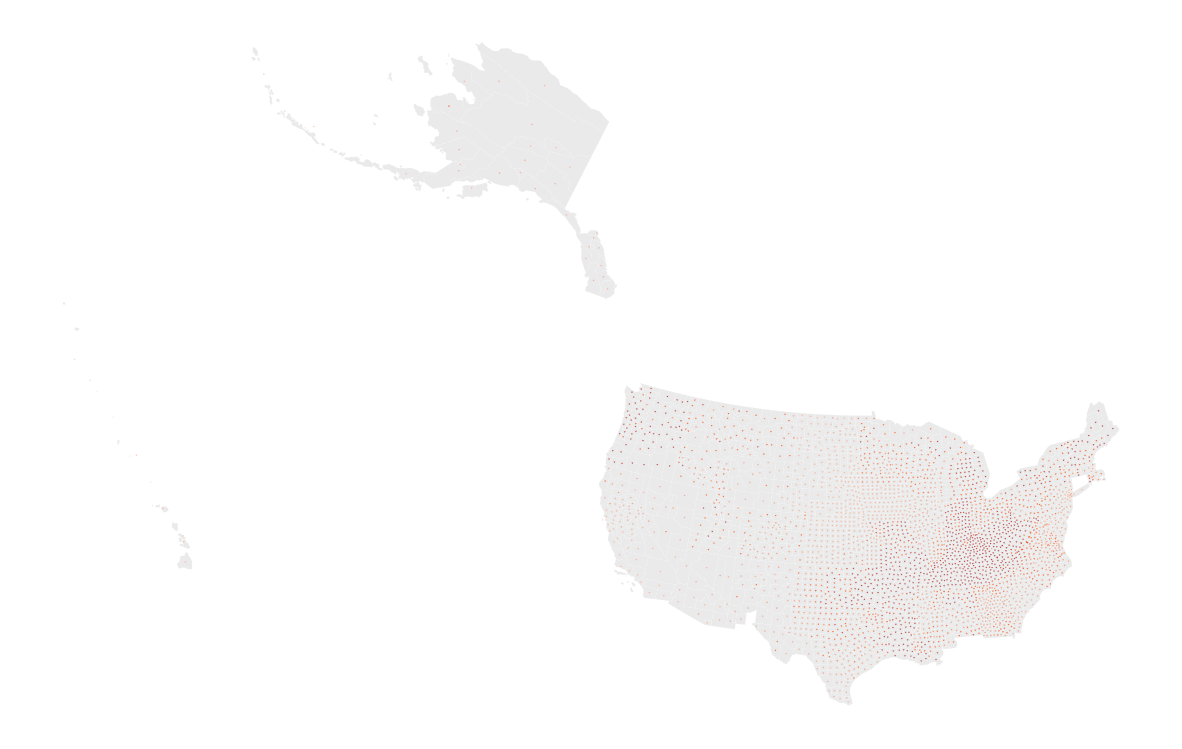

In [162]:
ax = geo_data.plot(
    figsize=(15, 15),
    color='#eaeaea',
    edgecolor='white',
    linewidth=0.05,
)
ax.axis('off')

# add a black state outline on top



def spike_color(value):
    if 33.3 > value >= 25:
        return 'firebrick'
    elif 25 > value >=23:
        return 'orangered'
    elif 23 > value >= 22:
        return 'coral'
    elif 22 > value >= 20:
        return 'darksalmon'
    else:
        return 'lightsalmon'   
    # you can do an if/elif/else for color
    # or you can look up "matplotlib color scales" (you can google that)

    
    
# Coefficient for spike height
multiplier = 50 ##0.00015 
## exponent = 5 

# Add spikes & labels
for i, row in geo_data.iterrows():
    x, y = row.centroid
    
    # print(triangle_height(row.DataValue_y))

    # Create a spike
    triangle = create_triangle(
        x,
        y,
        height = row.DataValue_y * 200,
        # height = triangle_height(row.DataValue_y) ,
        # height=(row.DataValue_y ** exponent) * multiplier, # 9-37%
        base=1000, 
        color=spike_color(row.DataValue_x)
    )
    
    ax.add_patch(triangle)

!rm ./asthma.svg
plt.savefig(f'./asthma.svg', bbox_inches='tight')


#### 5.1.5 add state map

In [89]:
geo_state = gpd.read_file(r'/Users/Owner/Downloads/gz_2010_us_040_00_5m.json')
geo_state.crs = "EPSG:4326"
geo_state

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."
5,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9..."
6,0400000US09,09,Connecticut,,4842.355,"POLYGON ((-71.79924 42.00807, -71.79792 41.935..."
7,0400000US10,10,Delaware,,1948.543,"MULTIPOLYGON (((-75.56493 39.58325, -75.57627 ..."
8,0400000US11,11,District of Columbia,,61.048,"POLYGON ((-77.03860 38.79151, -77.03890 38.800..."
9,0400000US12,12,Florida,,53624.759,"MULTIPOLYGON (((-82.82158 27.96444, -82.82980 ..."


<Axes: >

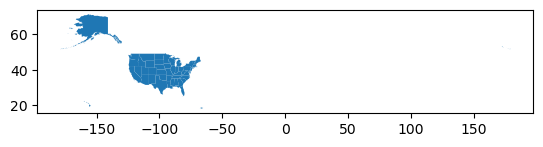

In [93]:
geo_state.plot()

In [94]:
geo_data.update_traces(marker_line_width=0, marker_opacity=0.8)
geo_data.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
geo_data.update_geos(
showsubunits=True, subunitcolor="black"
)
geo_data.show()

AttributeError: 'GeoDataFrame' object has no attribute 'update_traces'